In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Sep 24 14:22:49 2022

@author: cesartiznado
"""
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
keys = ["Time","S1","S2","S3","S4","S5","S6","S7","S8"]

data_0 = pd.read_csv("P1_T8.csv") 
data_0.columns = keys

t = data_0["Time"]
Sig1 = data_0["S1"]
Sig2 = data_0["S2"]
Sig3 = data_0["S3"]
Sig4 = data_0["S4"]
Sig5 = data_0["S5"]
Sig6 = data_0["S6"]
Sig7 = data_0["S7"]
Sig8 = data_0["S8"]

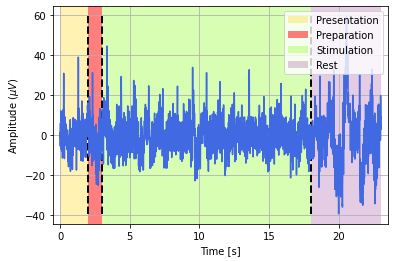

In [3]:
plt.plot(t,Sig1,color="royalblue")
plt.vlines(x=2,ymin=min(Sig1),ymax=max(Sig1),colors='black', ls='--', lw=2)
plt.vlines(x=3,ymin=min(Sig1),ymax=max(Sig1),colors='black', ls='--', lw=2)
plt.vlines(x=18,ymin=min(Sig1),ymax=max(Sig1),colors='black', ls='--', lw=2)
plt.axvspan(0, 2, color='gold', alpha=0.3, lw=0,label="Presentation")
plt.axvspan(2, 3, color='red', alpha=0.5, lw=0,label="Preparation")
plt.axvspan(3, 18, color='lawngreen', alpha=0.3, lw=0,label="Stimulation")
plt.axvspan(18, 23, color='purple', alpha=0.2, lw=0,label="Rest")
plt.xlim(min(t)-.5,max(t)+.5)
plt.ylim(min(Sig1)-5,max(Sig1)+5)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude ($\mu V$)")
plt.legend(loc=1)
plt.grid()
plt.savefig("Dat_regions.png",dpi=400)
plt.show()

#Objetive: With the observations estimate the estimulation frequency.

##We select only five seconds of the estimulation signal.

In [4]:
# Check were is the values of the time window 
for i in range(len(t)):
  if t.iloc[i] ==3:
    ini = i
    print(i)

  if t.iloc[i] ==9.0:
    end = i
    print(i)
# Select only the time window of 5 seconds.
t_set = t[ini:end]
S1_set = Sig1[ini:end]
# Make a new data frame just in case
S_1 = pd.DataFrame()
S_1["Time"] = t_set
S_1["Signal"] = S1_set

NS_1 = S_1.reset_index()

# print(S_1)

# print(NS_1)


# Metodo de deteccion de la frecuencia de estimulacion de SVee basado en modelos autoregresivos.

767
2303


## Plot the data that we are going to use to estimate the objective

             index         Time       Signal
count  1536.000000  1536.000000  1536.000000
mean   1534.500000     5.998047     0.218288
std     443.549321     1.732615     7.540772
min     767.000000     3.000000   -18.316116
25%    1150.750000     4.499023    -5.126315
50%    1534.500000     5.998047    -0.181996
75%    1918.250000     7.497070     4.806381
max    2302.000000     8.996094    44.517696


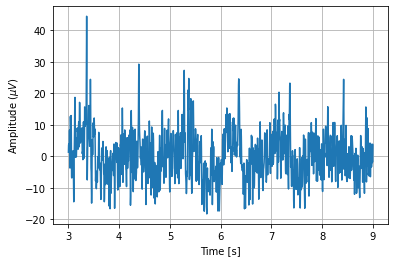

In [5]:
## First a preliminar estatistical description of the table
print(NS_1.describe())
# Then, the plot of the data.
plt.plot(NS_1["Time"],NS_1["Signal"])
plt.xlabel("Time [s]")
plt.ylabel("Amplitude ($\mu V$)")
plt.grid()
plt.show()

##Stationary Test

In [6]:
from statsmodels.tsa.stattools import adfuller

S1_statTest = adfuller

TestAF = adfuller(S1_set)
print("Dick-fuller statistics:",TestAF[0])
print("P-value:",TestAF[1])
# Then if the p-values es minor to 0.05

Dick-fuller statistics: -4.100348009931111
P-value: 0.0009672424556578054


## AR Order estimation

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


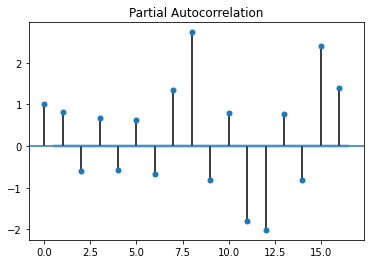

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf = plot_pacf(S1_set, lags=16)
# We selected only 8 orders

##Train the AR model

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


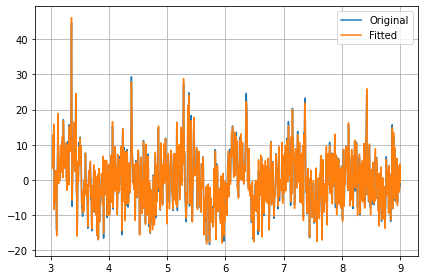

                            AutoReg Model Results                             
Dep. Variable:                 Signal   No. Observations:                 1536
Model:                     AutoReg(9)   Log Likelihood               -2398.310
Method:               Conditional MLE   S.D. of innovations              1.164
Date:                Tue, 29 Nov 2022   AIC                              0.318
Time:                        07:44:54   BIC                              0.356
Sample:                             9   HQIC                             0.332
                                 1536                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0049      0.030      0.166      0.868      -0.053       0.063
Signal.L1      3.2148      0.024    135.903      0.000       3.168       3.261
Signal.L2     -6.1254      0.076    -80.652      0.0

In [10]:
from statsmodels.tsa.ar_model import AutoReg,AutoRegResults
p = 9 # Order of the Autoreggresive model (Number of lags) 3

modelAR8 = AutoReg(NS_1["Signal"],lags = p)
pred = modelAR8.fit()

# print(pred.fittedvalues)
plt.plot(NS_1["Time"][p:],NS_1["Signal"][p:], label= "Original")
plt.plot(NS_1["Time"][p:],pred.fittedvalues,label = "Fitted")

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


print(pred.summary())
print(np.var(pred.resid))
# for i in range(len(predict)):
#   print("predicted = %f, expected = %f" % (predict[i],))

## Asignation of Parameters

In [11]:
#
print(pred.bse)
print(pred.ar_lags)
s = pred.params
P = np.zeros(len(pred.params))
for i in range(1,len(pred.params)):
  P[i] = pred.params[i]

intercept    0.029809
Signal.L1    0.023655
Signal.L2    0.075949
Signal.L3    0.146324
Signal.L4    0.208710
Signal.L5    0.233341
Signal.L6    0.208645
Signal.L7    0.146235
Signal.L8    0.075893
Signal.L9    0.023639
dtype: float64
[1 2 3 4 5 6 7 8 9]


## Spectrogram estimation

intercept    0.029809
Signal.L1    0.023655
Signal.L2    0.075949
Signal.L3    0.146324
Signal.L4    0.208710
Signal.L5    0.233341
Signal.L6    0.208645
Signal.L7    0.146235
Signal.L8    0.075893
Signal.L9    0.023639
dtype: float64
[1 2 3 4 5 6 7 8 9]
3840
1
2
3
4
5
6
7
8
9
10.080750195363377


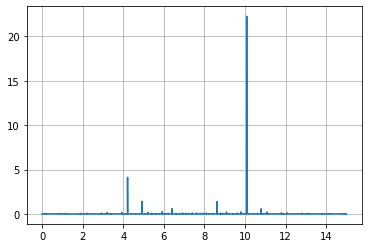

In [ ]:
# Variance of the estimated Errors and the lags
print(pred.bse)
print(pred.ar_lags)

V = np.var(pred.bse[1:])
# Set a frequency window
fs = 1/256
Numb = 256*15
f = np.linspace(0,15,Numb)
print(len(f))
# Define a function to determinate the sumatory in all the parameters
coefe = []
for i in range(1 , len(pred.params)):
        coefe.append(P[i]*np.cos(2*np.pi*i))
        print(i)
#print(coefe)
pi = 3.1415
den = np.zeros(len(f))
for i in range(len(f)):
  #print(np.cos(2*3.1415*1*i))
  #den[i] = abs(1 - (P[1]*np.cos(2*pi*1*f[i]) + P[2]*np.cos(2*np.pi*2*f[i]) + P[3]*np.cos(2*np.pi*3*f[i]) ))**2
  den[i] = P[1]*np.cos(2*pi*1*f[i]) + P[2]*np.cos(2*np.pi*2*f[i]) + P[3]*np.cos(2*np.pi*3*f[i])
# Spectrogram
S = V/abs(den)#pred.bse[0]**2/abs(den)
#print(den)
# Peak of the spectrogram
L = np.argmax(S)
print(f[L])
# Plot of the espectrogram
plt.plot(f,S)
plt.grid()
plt.show()


## Create a function to made this to every signal that we want.

In [13]:
# Set a frequency window
fs = 1/256
Numb = 256*15
f = np.linspace(0,15,Numb)
peak = np.zeros(9)
Error = np.zeros(9)

def AR(t,Sig,p,count,Or):
  # Detect the time window in which are working
  for i in range(len(t)):
    if t.iloc[i] == 3.0:
      ini_indx = i
      # print(i)
      # print(ini_indx)

    if t.iloc[i] == 18.0:
      # print(i)
      end_indx = i
      # print(end_indx)

# Select only the time window of the Stimulation
  t_set = t[ini_indx:end_indx]
  S_set = Sig[ini_indx:end_indx]
# Make a new data frame to manipulate the information to pleasure.
  S_D = pd.DataFrame()
  S_D["Time"] = t_set
  S_D["Signal"] = S_set

  RS_D = S_D.reset_index()
# Adfuller test to estimate the order of the autoregresive model.

# AR_Model 
  modelARp = AutoReg(RS_D["Signal"],lags = p)
  pred = modelARp.fit()
  # plt.plot(RS_D["Time"][p:],RS_D["Signal"][p:], label= "Original")
  # plt.plot(RS_D["Time"][p:],pred.fittedvalues,label = "Fitted")
  # plt.xlabel("Time [s]")
  # plt.ylabel("Amplitude ($\mu V$)")
  # plt.legend()
  # plt.grid()
  # plt.tight_layout()
  # plt.show()



  # Variance of the estimated errors
  var1 = np.var(pred.resid)

  P = np.zeros(len(pred.params))
  for i in range(1,len(pred.params)):
    #print(i)
    P[i] = pred.params[i]


  # DataFrame and sumPrint Sum
  K = pd.DataFrame()


  # Define a function to determinate the sumatory in all the parameters
  pi = np.pi
  j = 1
  den = np.zeros(len(f))
  k = np.zeros((len(pred.params),len(f)))
  s = np.zeros(len(f))
  for i in range(1,len(pred.params)):
    for j in range(len(f)):
      k[i,j] = P[i]*np.cos(2*i*pi*f[j])
  for i in range(len(f)):
    s[i] = sum(k[:,i])

  # print(sum)    
  # for i in range(len(f)): 
  #     sum[i] = sum(d[:,j])   
  
#  print(sum(d[:,1]))

  # Spectrogram
  S = var1/s
  # Peak of the spectrogram
  L = np.argmax(S)
  print(f"The Sp_Peak is:{f[L]} in strain: {count}")

  #Plot of the espectrogram
  plt.figure(dpi=400)
  plt.plot(f,S)
  plt.ylabel("Power Spectral Density")
  plt.xlabel("Frequency [Hz]")
  plt.grid()
  plt.grid()
  plt.show()

  peak[count] = f[L]
  Error[count] = abs(f[L] - Or)
  #meanE = Error[count]/8.0


# meanE = np.zeros(30)
# for i in range(2,30):
#     print("p =",i)
#     print("Error",Error,i)
#     meanE[i] = sum(Error)/ 8.0
#     print(meanE[i])
#     AR(t,Sig1,i,1,5)
#     AR(t,Sig2,i,2,5)
#     AR(t,Sig3,i,3,5)
#     AR(t,Sig4,i,4,5)
#     AR(t,Sig5,i,5,5)
#     AR(t,Sig6,i,6,5)
#     AR(t,Sig7,i,7,5)
#     AR(t,Sig8,i,8,5)
#     if meanE[i]< 1.0:
#       print("The best error",meanE[i],"Lag",i)



##Esto


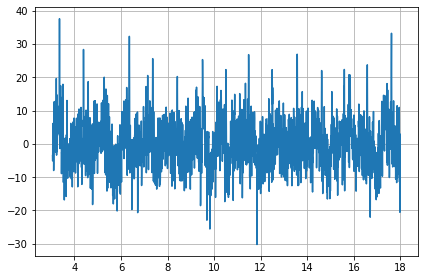

                            AutoReg Model Results                             
Dep. Variable:                 Signal   No. Observations:                 3840
Model:                    AutoReg(16)   Log Likelihood               -4926.127
Method:               Conditional MLE   S.D. of innovations              0.877
Date:                Mon, 21 Nov 2022   AIC                             -0.252
Time:                        17:37:01   BIC                             -0.223
Sample:                            16   HQIC                            -0.242
                                 3840                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0031      0.014      0.215      0.830      -0.025       0.031
Signal.L1      3.7464      0.016    236.137      0.000       3.715       3.778
Signal.L2     -8.5212      0.060   -140.971      0.0

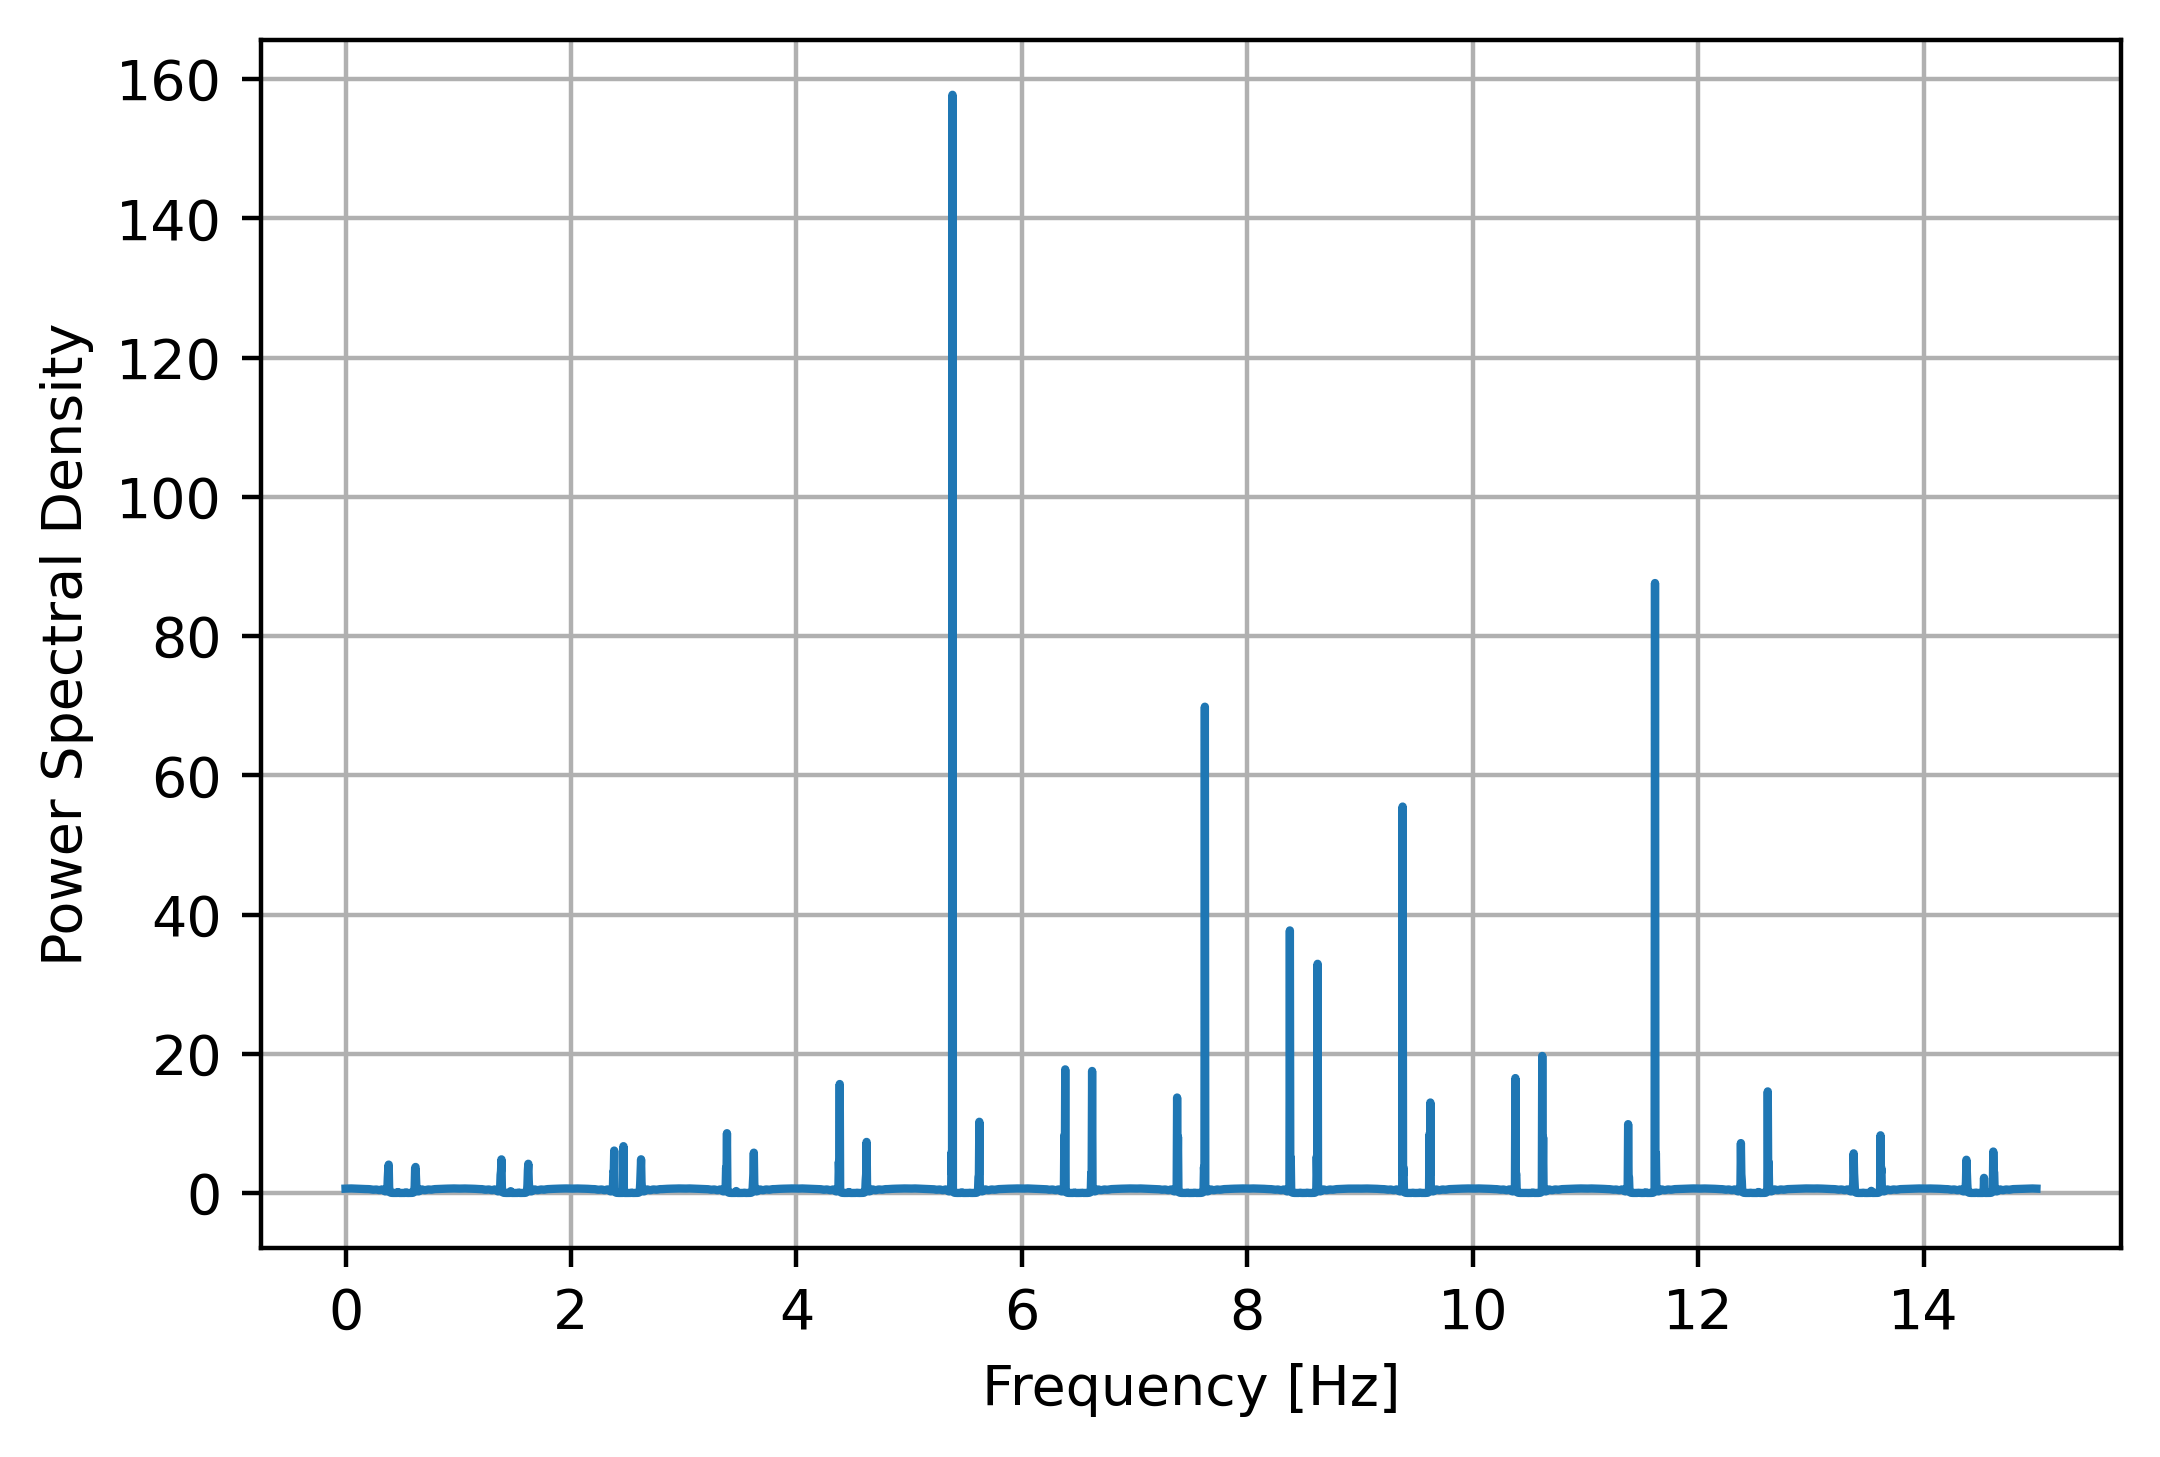

In [ ]:
# Set a frequency window
fs = 1/256
Numb = 256*15
f = np.linspace(0,15,Numb)
peak = np.zeros(9)

p = 16
Sig = Sig8
# Detect the time window in which are working
for i in range(len(t)):
  if t.iloc[i] == 3.0:
    ini_indx = i
    # print(i)
    # print(ini_indx)

  if t.iloc[i] == 18.0:
    # print(i)
    end_indx = i
    # print(end_indx)

# Select only the time window of the Stimulation
t_set = t[ini_indx:end_indx]
S_set = Sig[ini_indx:end_indx]
# Make a new data frame to manipulate the information to pleasure.
S_D = pd.DataFrame()
S_D["Time"] = t_set
S_D["Signal"] = S_set

RS_D = S_D.reset_index()
# Adfuller test to estimate the order of the autoregresive model.

# AR_Model 
modelARp = AutoReg(RS_D["Signal"],lags = p)
pred = modelARp.fit()
plt.plot(RS_D["Time"][p:],RS_D["Signal"][p:], label= "Original")
# plt.plot(RS_D["Time"][p:],pred.fittedvalues,label = "Fitted")
# plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

print(pred.summary())
print(pred.fpe)

# Variance of the estimated errors
var = pred.bse[0]**2
var1 = pred.fpe**2
P = np.zeros(len(pred.params))
for i in range(1,len(pred.params)):
  print(i)
  P[i] = pred.params[i]

# Define a function to determinate the sumatory in all the parameters
pi = 3.1415
j = 1
den = np.zeros(len(f))
for i in range(len(f)):        
  #den[i] = abs(1 - ( P[1]*np.cos(2*pi*1*f[i]) + P[2]*np.cos(2*np.pi*2*f[i]) + P[3]*np.cos(2*np.pi*3*f[i]) ))**2 #+ P[4]*np.cos(2*np.pi*4*f[i]) + P[5]*np.cos(2*np.pi*5*f[i]) +  P[6]*np.cos(2*np.pi*6*f[i]) + P[7]*np.cos(2*np.pi*7*f[i]) + P[8]*np.cos(2*np.pi*8*f[i])  )**2 
  #den[i] = abs( P[1]*np.cos(2*pi*1*f[i]) + P[2]*np.cos(2*np.pi*2*f[i]) + P[3]*np.cos(2*np.pi*3*f[i]) )#+ P[4]*np.cos(2*np.pi*4*f[i]) + P[5]*np.cos(2*np.pi*5*f[i]) +  P[6]*np.cos(2*np.pi*6*f[i]) + P[7]*np.cos(2*np.pi*7*f[i]) + P[8]*np.cos(2*np.pi*8*f[i])  )**2 
  #den[i] = abs( 1 - (P[1]*np.cos(2*pi*1*f[i]) + P[2]*np.cos(2*np.pi*2*f[i]) + P[3]*np.cos(2*np.pi*3*f[i]) + P[4]*np.cos(2*np.pi*4*f[i]) + P[5]*np.cos(2*np.pi*5*f[i]) +  P[6]*np.cos(2*np.pi*6*f[i]) + P[7]*np.cos(2*np.pi*7*f[i]) + P[8]*np.cos(2*np.pi*8*f[i]) )  )**2 
  den[i] = P[j]*np.cos(2*pi*j*f[i]) + P[j+1]*np.cos(2*pi*(j+1)*f[i]) + P[j+2]*np.cos(2*pi*(j+2)*f[i]) + P[j+3]*np.cos(2*pi*(j+3)*f[i]) + P[j+4]*np.cos(2*pi*(j+4)*f[i]) + P[j+5]*np.cos(2*pi*(j+5)*f[i]) + P[j+6]*np.cos(2*pi*(j+6)*f[i]) + P[j+7]*np.cos(2*pi*(j+7)*f[i]) + P[j+8]*np.cos(2*pi*(j+8)*f[i]) + P[j+9]*np.cos(2*pi*(j+9)*f[i]) + P[j+10]*np.cos(2*pi*(j+10)*f[i]) + P[j+11]*np.cos(2*pi*(j+11)*f[i]) + P[j+12]*np.cos(2*pi*(j+12)*f[i]) + P[j+13]*np.cos(2*pi*(j+13)*f[i]) + P[j+14]*np.cos(2*pi*(j+14)*f[i]) + P[j+15]*np.cos(2*pi*(j+15)*f[i])  
  #den[i] = abs(1 - ( P[j]*np.cos(2*pi*j*f[i]) + P[j+1]*np.cos(2*pi*(j+1)*f[i]) + P[j+2]*np.cos(2*pi*(j+2)*f[i]) + P[j+3]*np.cos(2*pi*(j+3)*f[i]) + P[j+4]*np.cos(2*pi*(j+4)*f[i]) + P[j+5]*np.cos(2*pi*(j+5)*f[i]) + P[j+6]*np.cos(2*pi*(j+6)*f[i]) + P[j+7]*np.cos(2*pi*(j+7)*f[i]) + P[j+8]*np.cos(2*pi*(j+8)*f[i]) + P[j+9]*np.cos(2*pi*(j+9)*f[i]) + P[j+10]*np.cos(2*pi*(j+10)*f[i]) + P[j+11]*np.cos(2*pi*(j+11)*f[i]) + P[j+12]*np.cos(2*pi*(j+12)*f[i]) + P[j+13]*np.cos(2*pi*(j+13)*f[i]) + P[j+14]*np.cos(2*pi*(j+14)*f[i]) + P[j+15]*np.cos(2*pi*(j+15)*f[i])  ))**2
# Spectrogram
S = 0.66*2/abs(den)
S = var1/abs(den)
# Peak of the spectrogram
L = np.argmax(S)
print("The peak of the spectrogram is:",f[L])

# Plot of the espectrogram
plt.figure(dpi=400)
plt.plot(f,S)
plt.ylabel("Power Spectral Density")
plt.xlabel("Frequency [Hz]")
plt.grid()
plt.show()
print(pred)
#peak[count] = f[L]

# PSD with Fourier
#plt.psd(pred.fittedvalues,256,15.0)  


# AR(t,Sig1,16,1)
# AR(t,Sig2,16,2)
# AR(t,Sig3,16,3)
# AR(t,Sig4,16,4)
# AR(t,Sig5,16,5)
# AR(t,Sig6,16,6)
# AR(t,Sig7,16,7)
# AR(t,Sig8,16,8)



# AR(t,Sig1,3,1)
# AR(t,Sig2,3,2)
# AR(t,Sig3,3,3)
# AR(t,Sig4,3,4)
# #AR(t,Sig5,3,5)
# AR(t,Sig6,3,6)
# AR(t,Sig7,3,7)
# AR(t,Sig8,3,8)


##Sample 80

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


The Sp_Peak is:6.56030216202136 in strain: 1


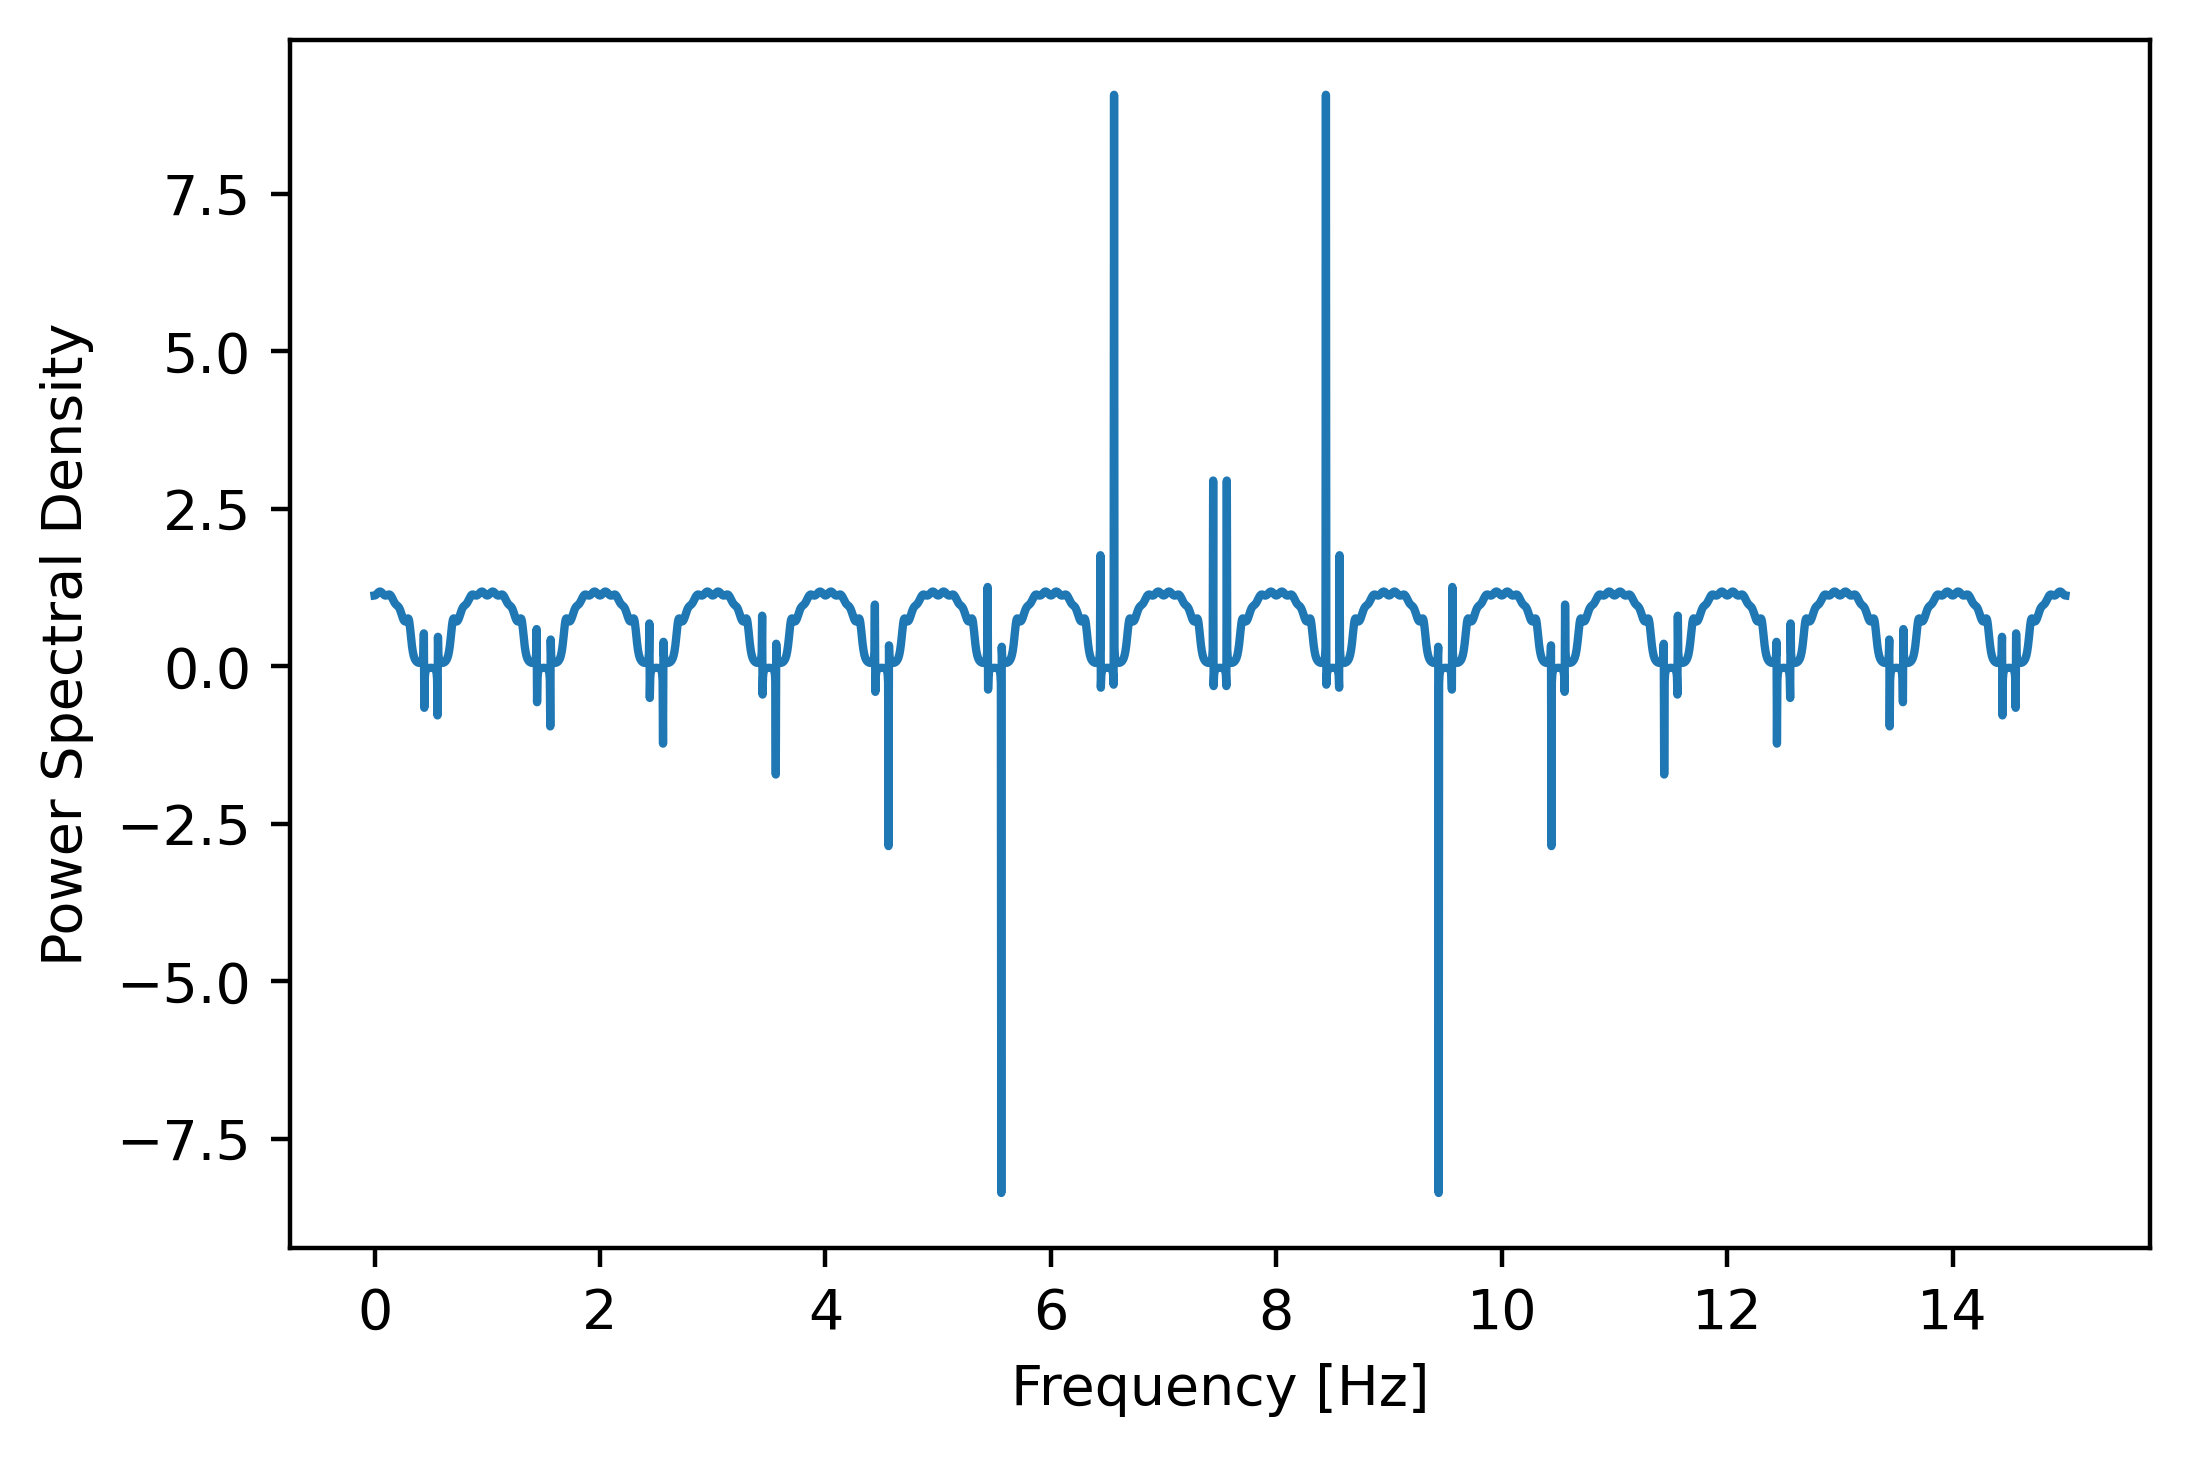

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


The Sp_Peak is:6.56030216202136 in strain: 2


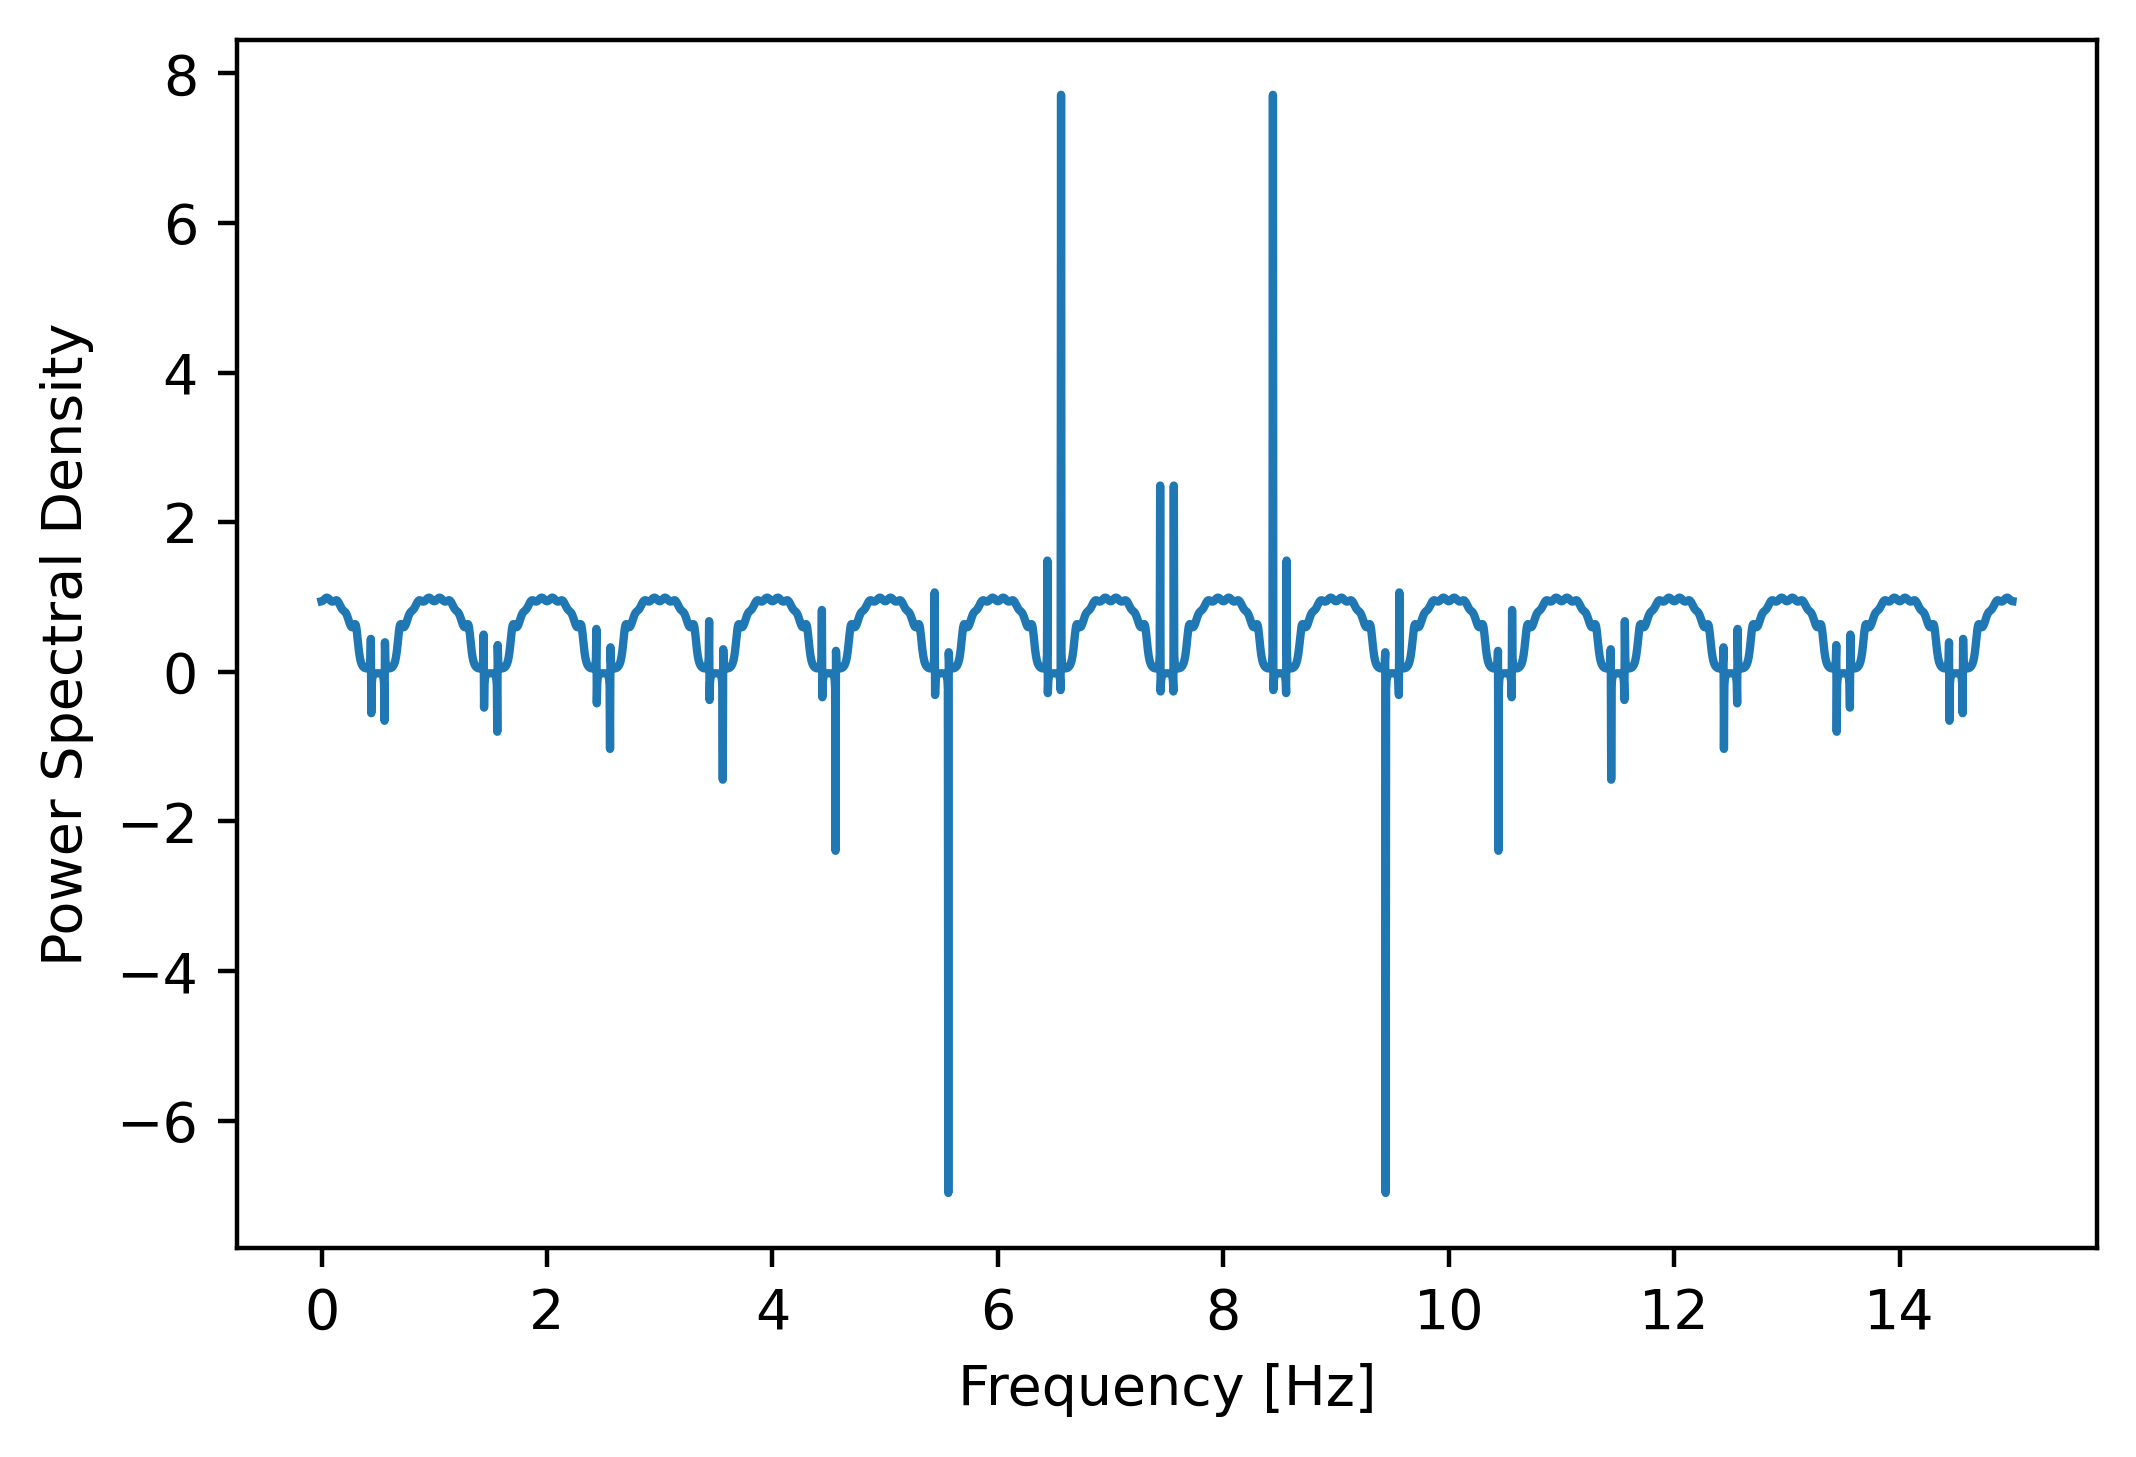

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


The Sp_Peak is:6.56030216202136 in strain: 3


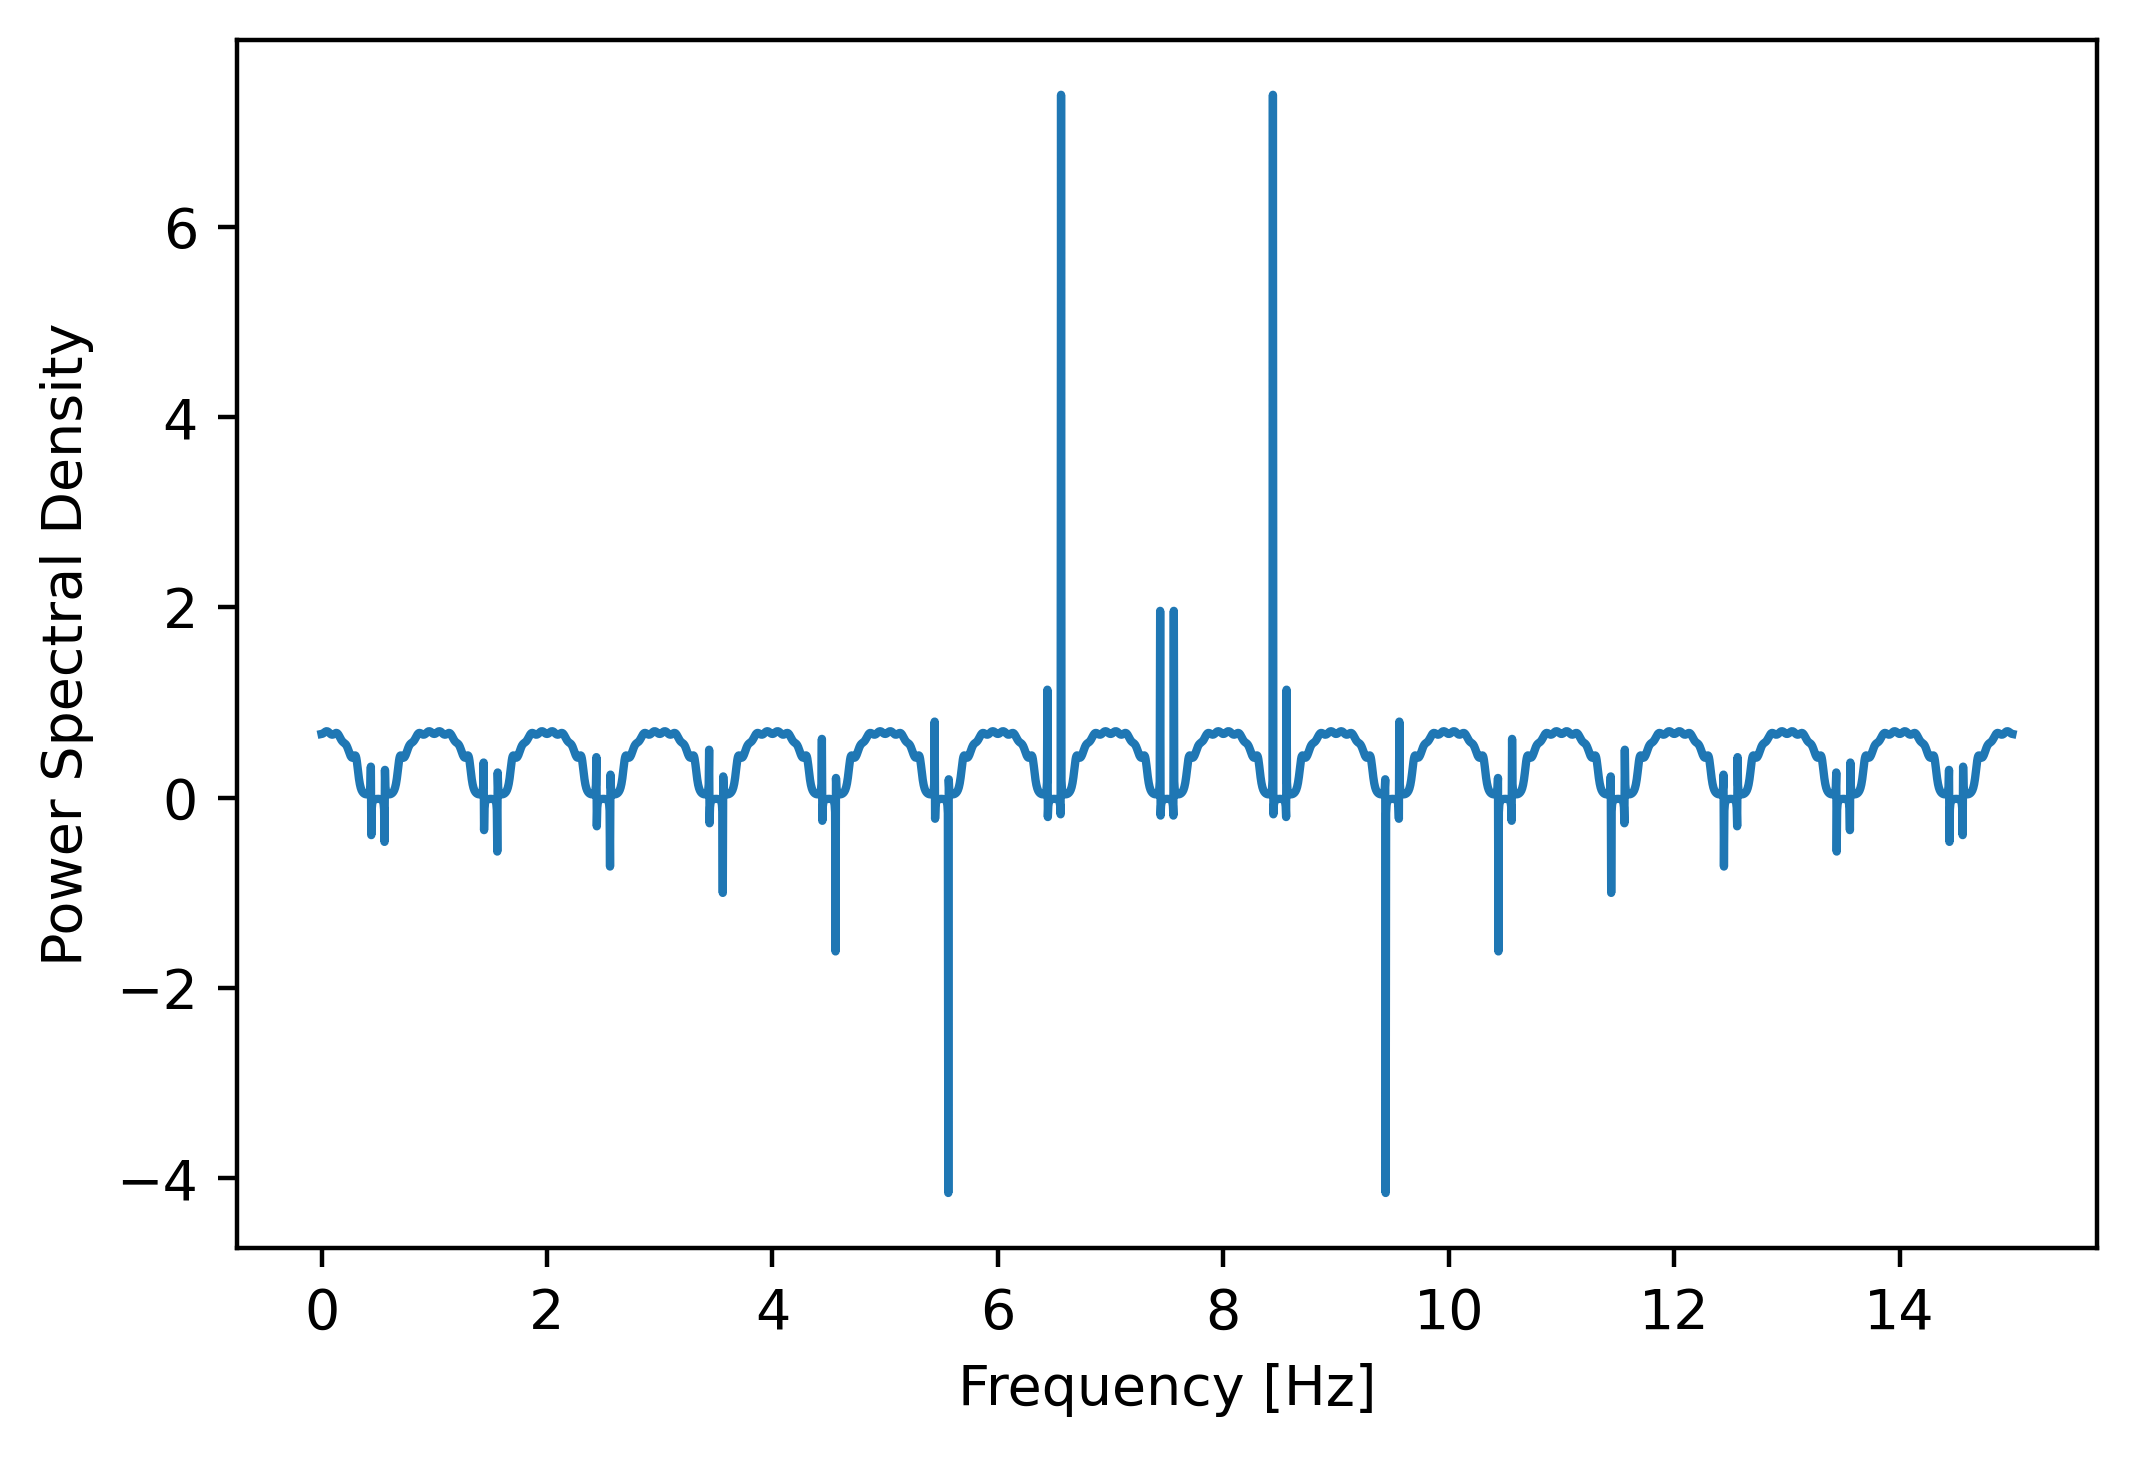

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


The Sp_Peak is:6.56030216202136 in strain: 4


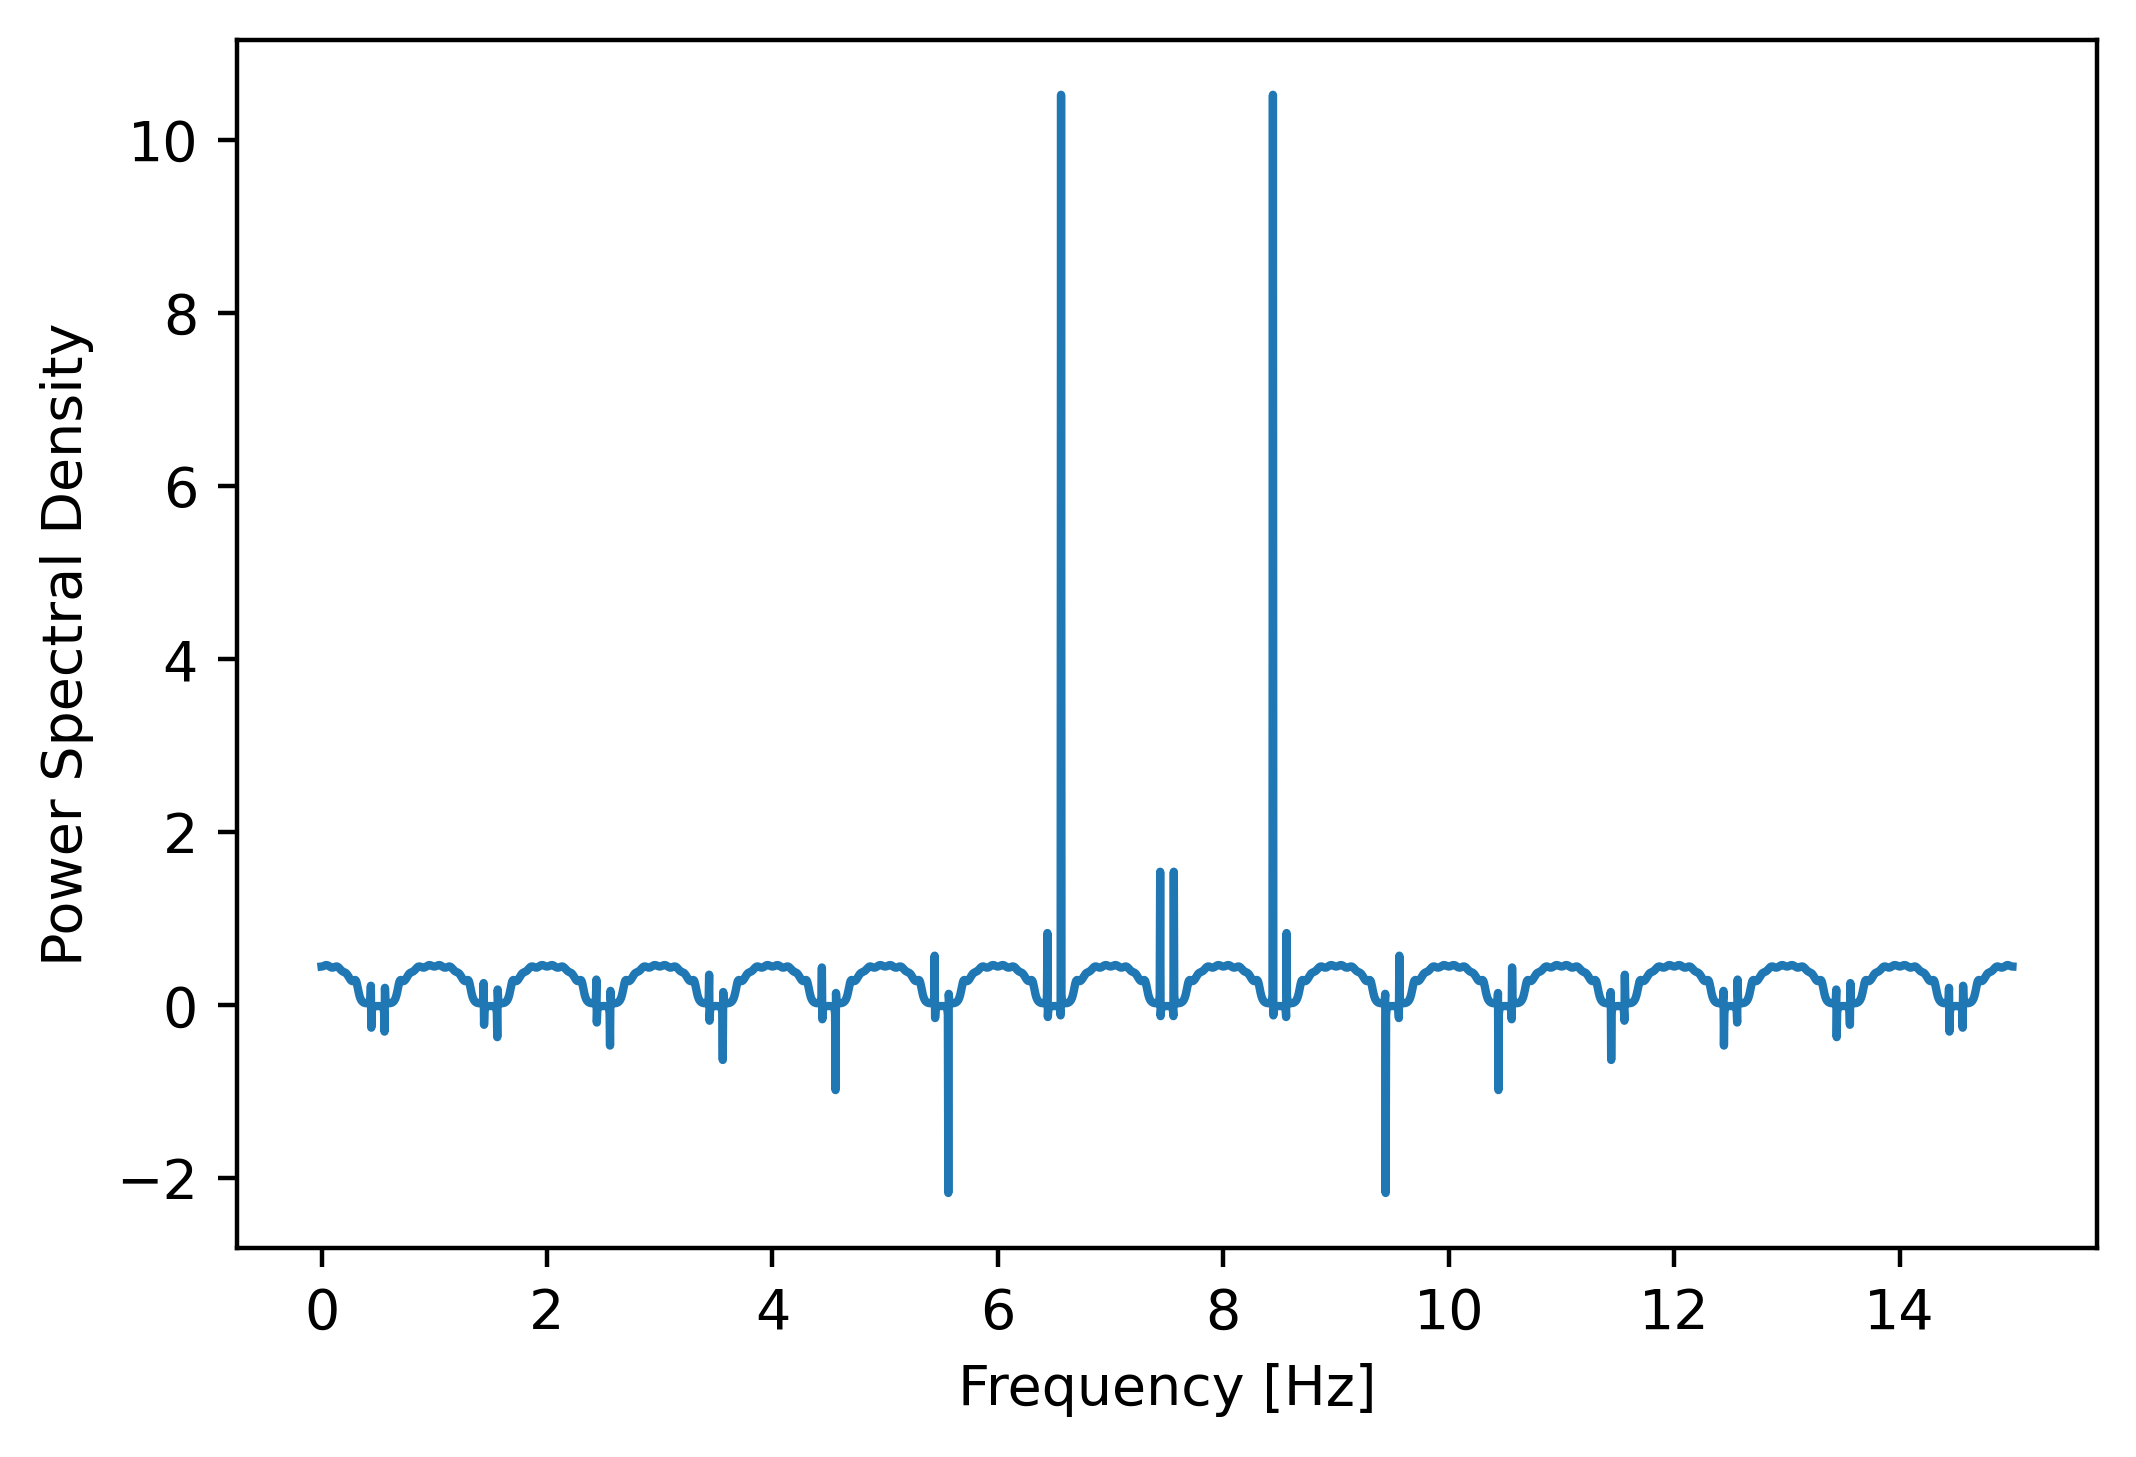

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


The Sp_Peak is:7.4394373534774685 in strain: 5


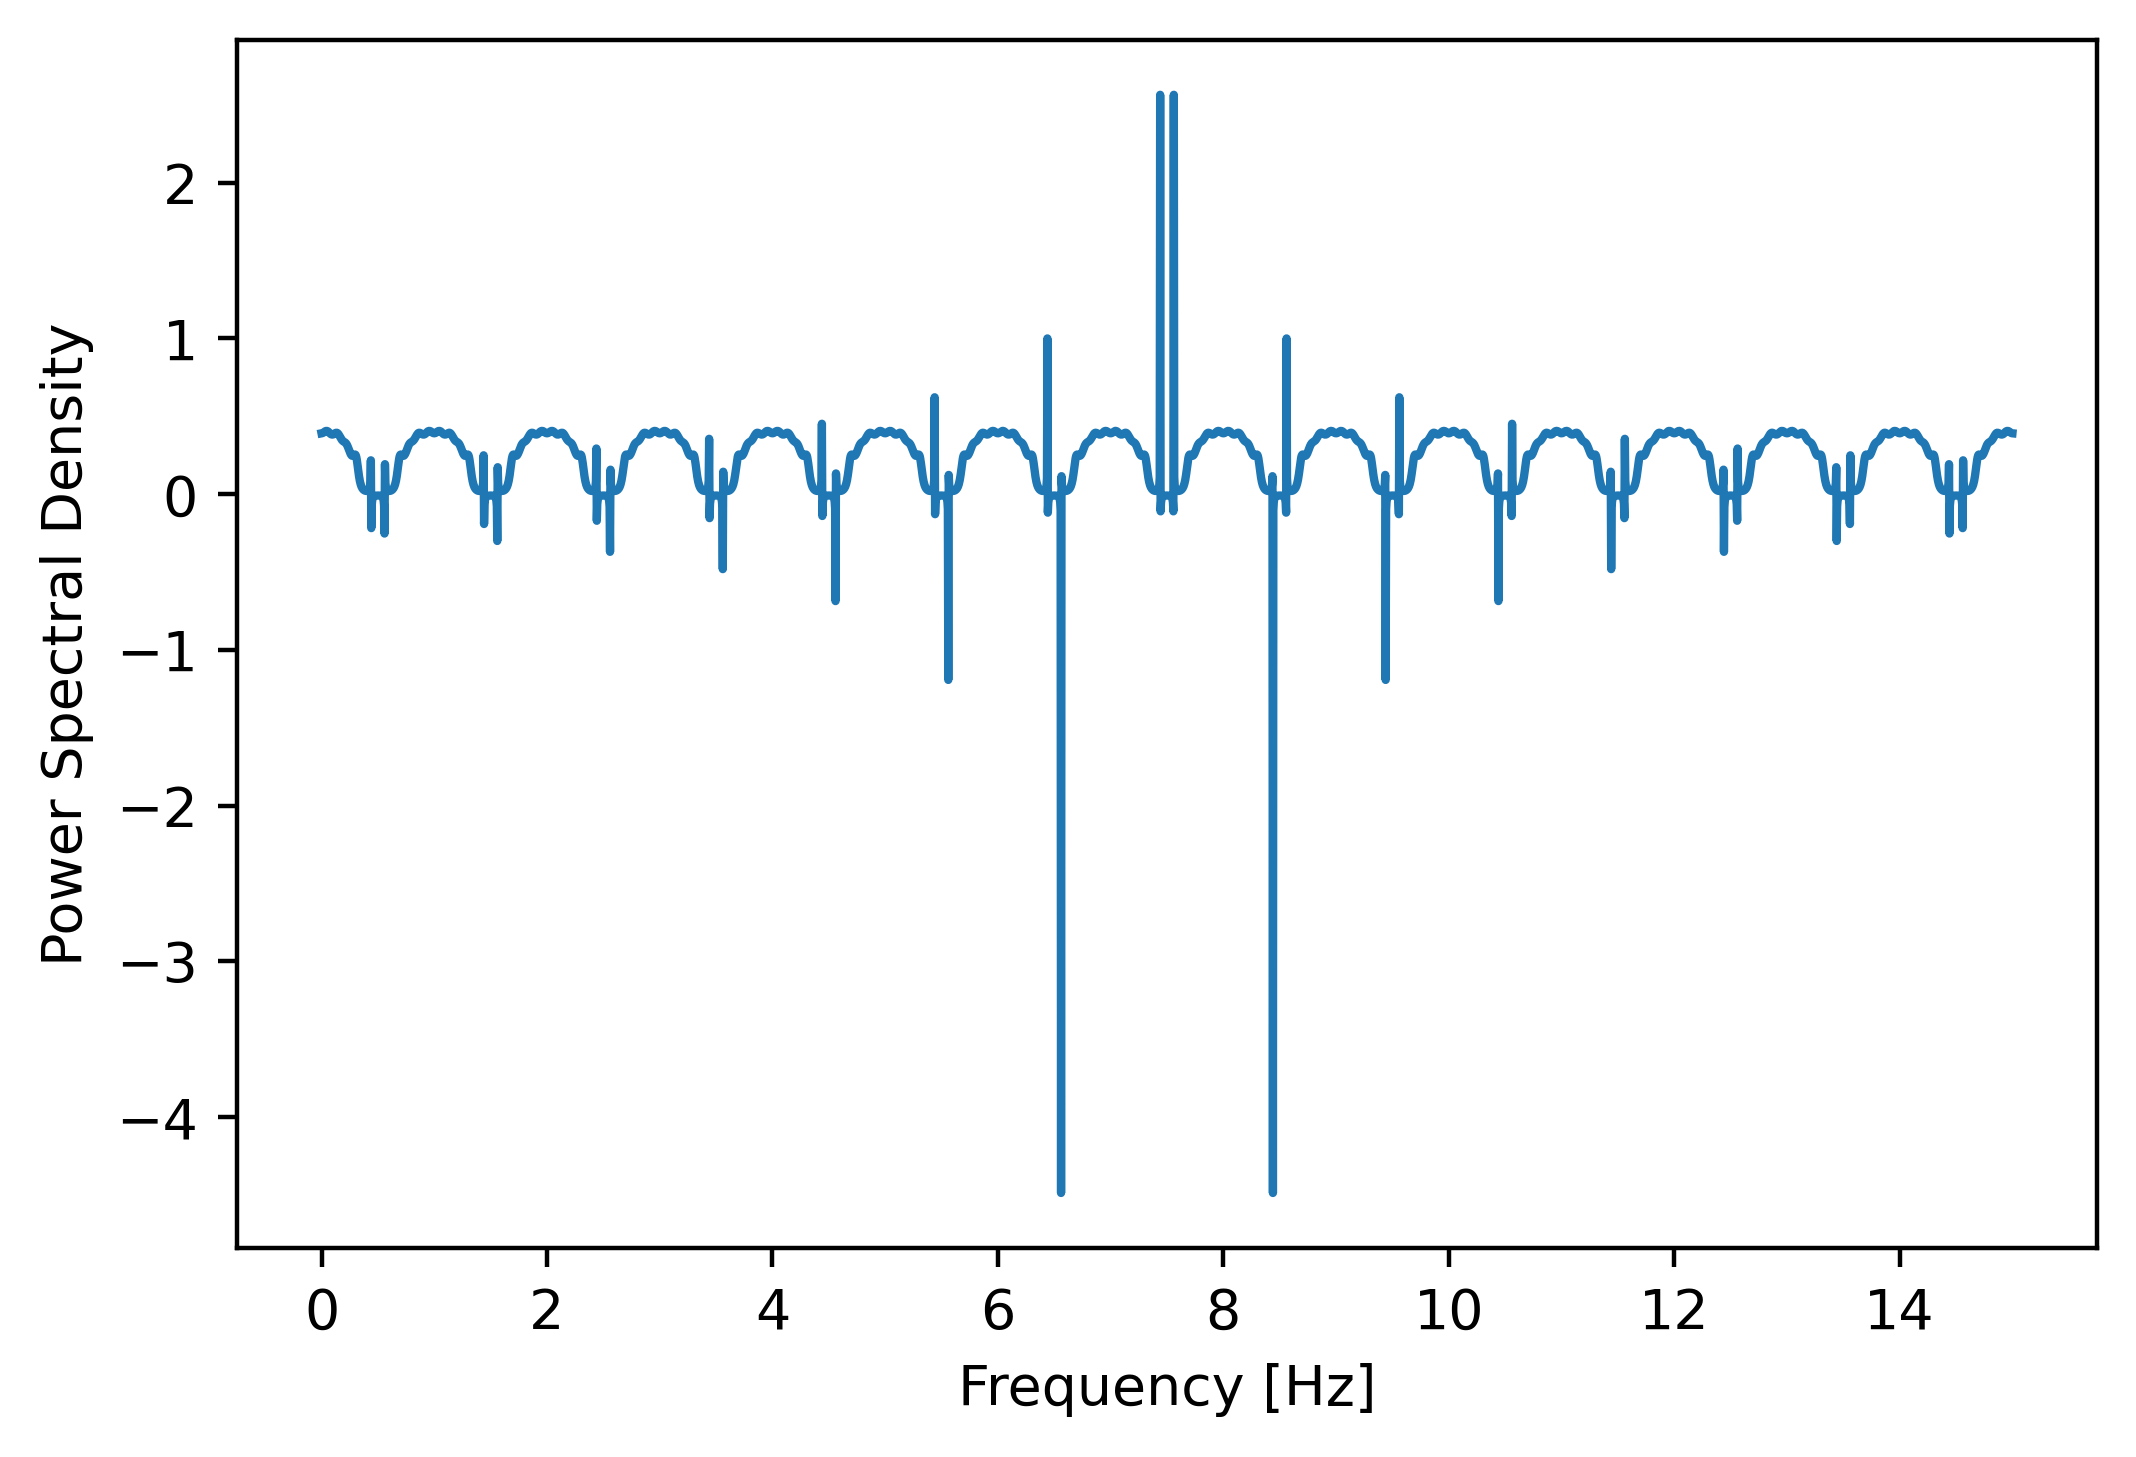

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


The Sp_Peak is:6.56030216202136 in strain: 6


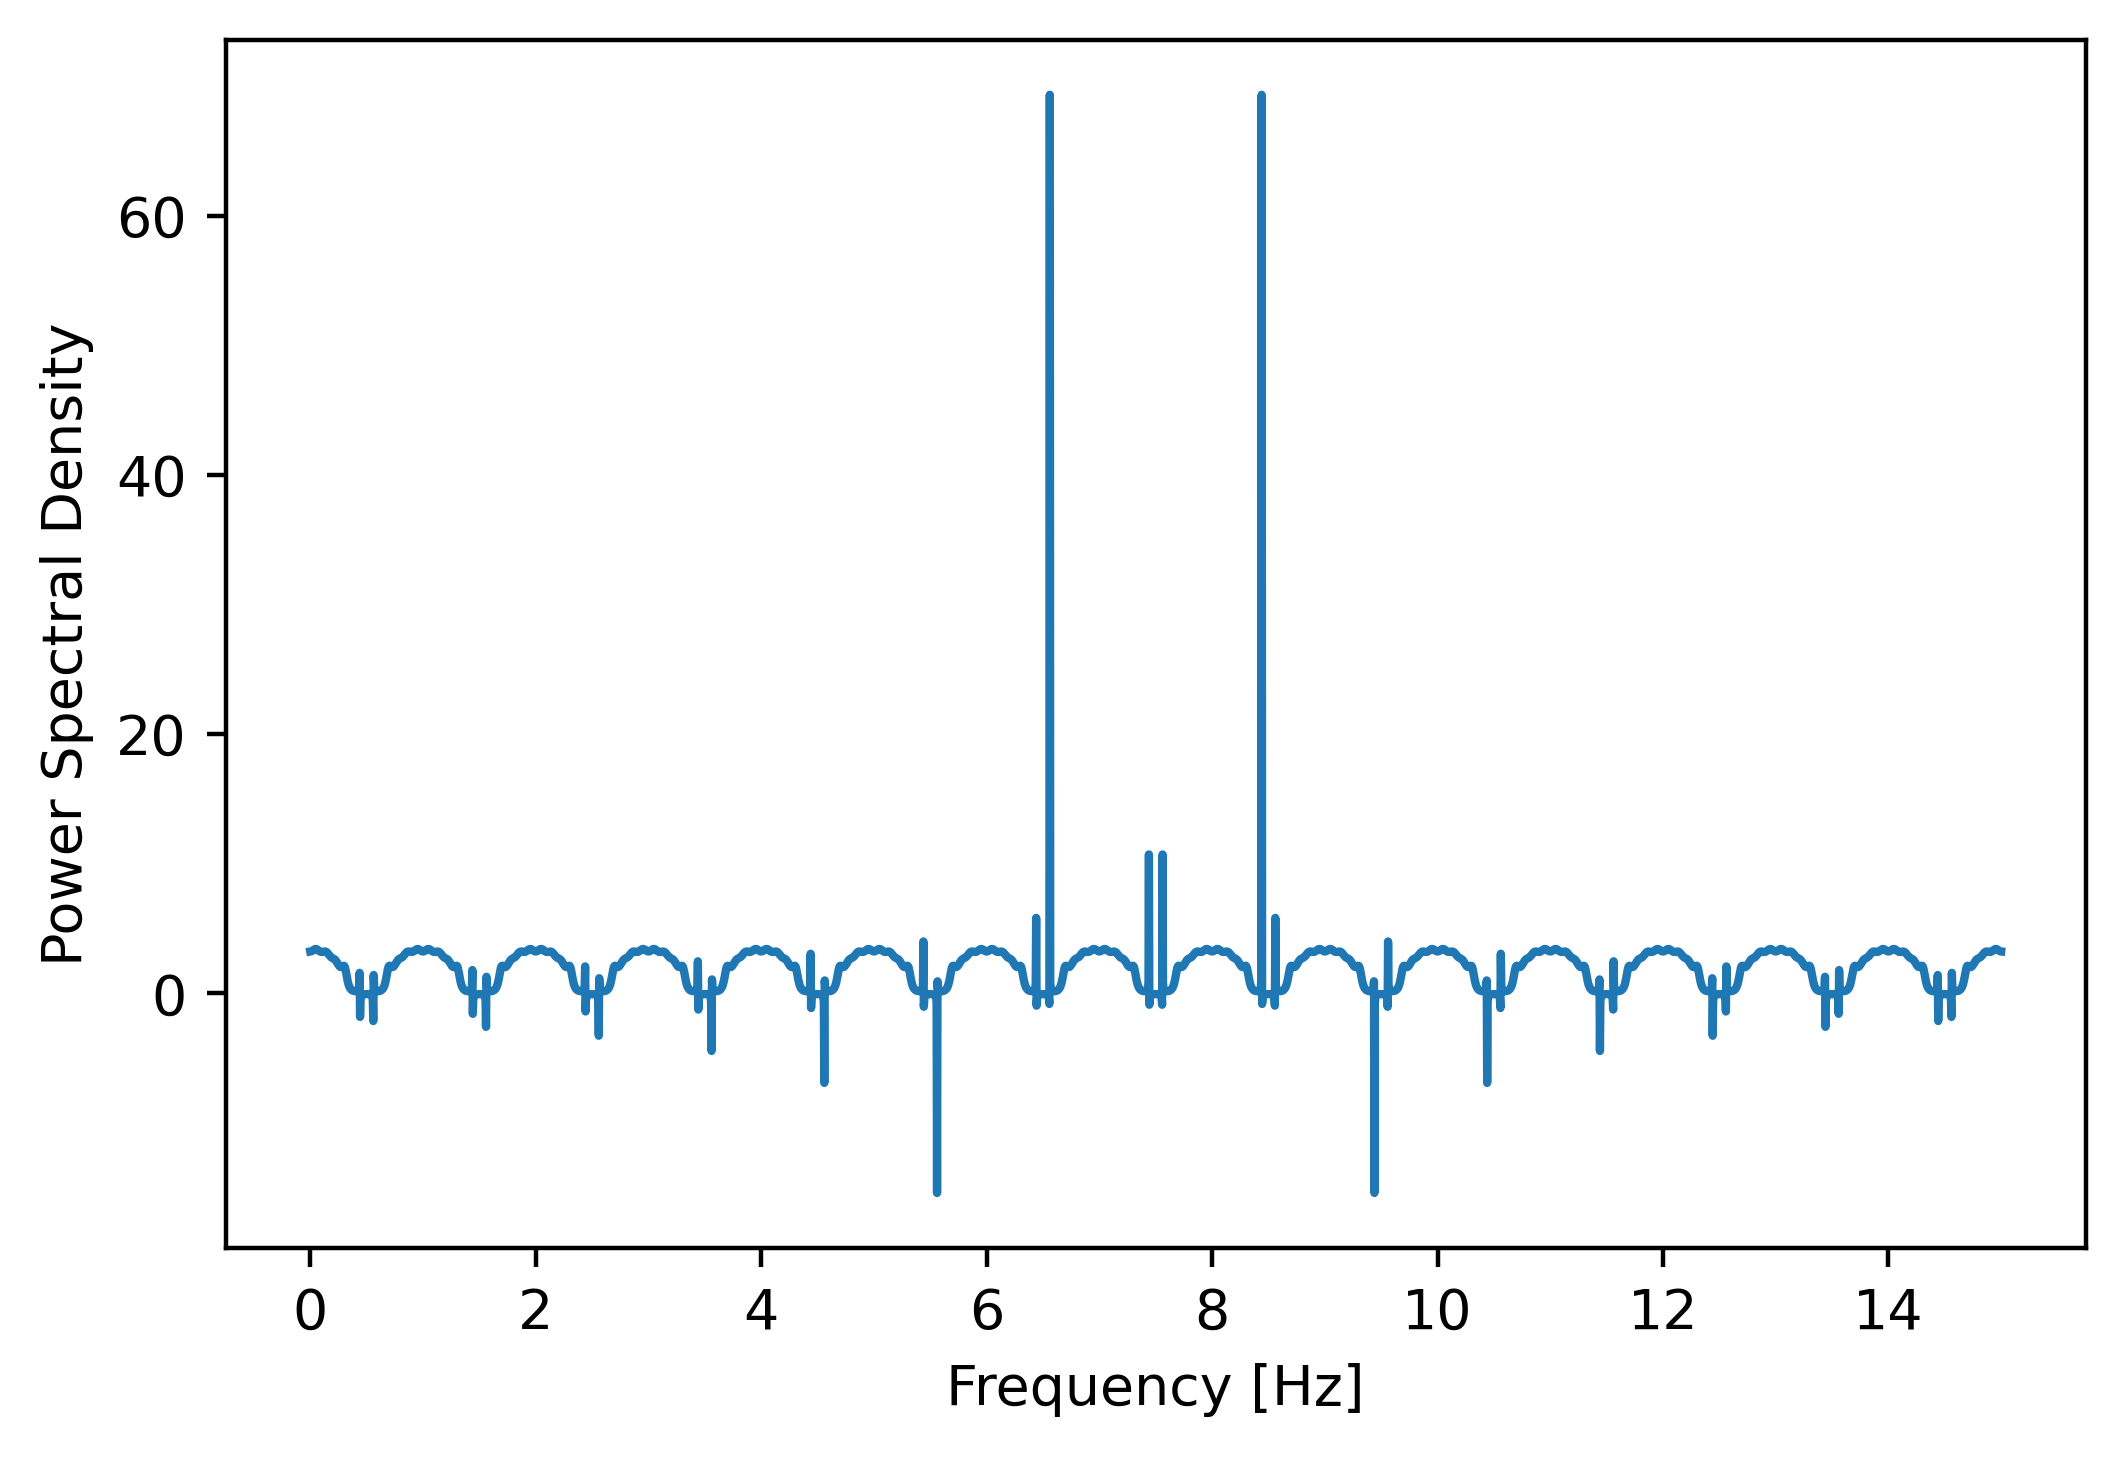

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


The Sp_Peak is:7.4394373534774685 in strain: 7


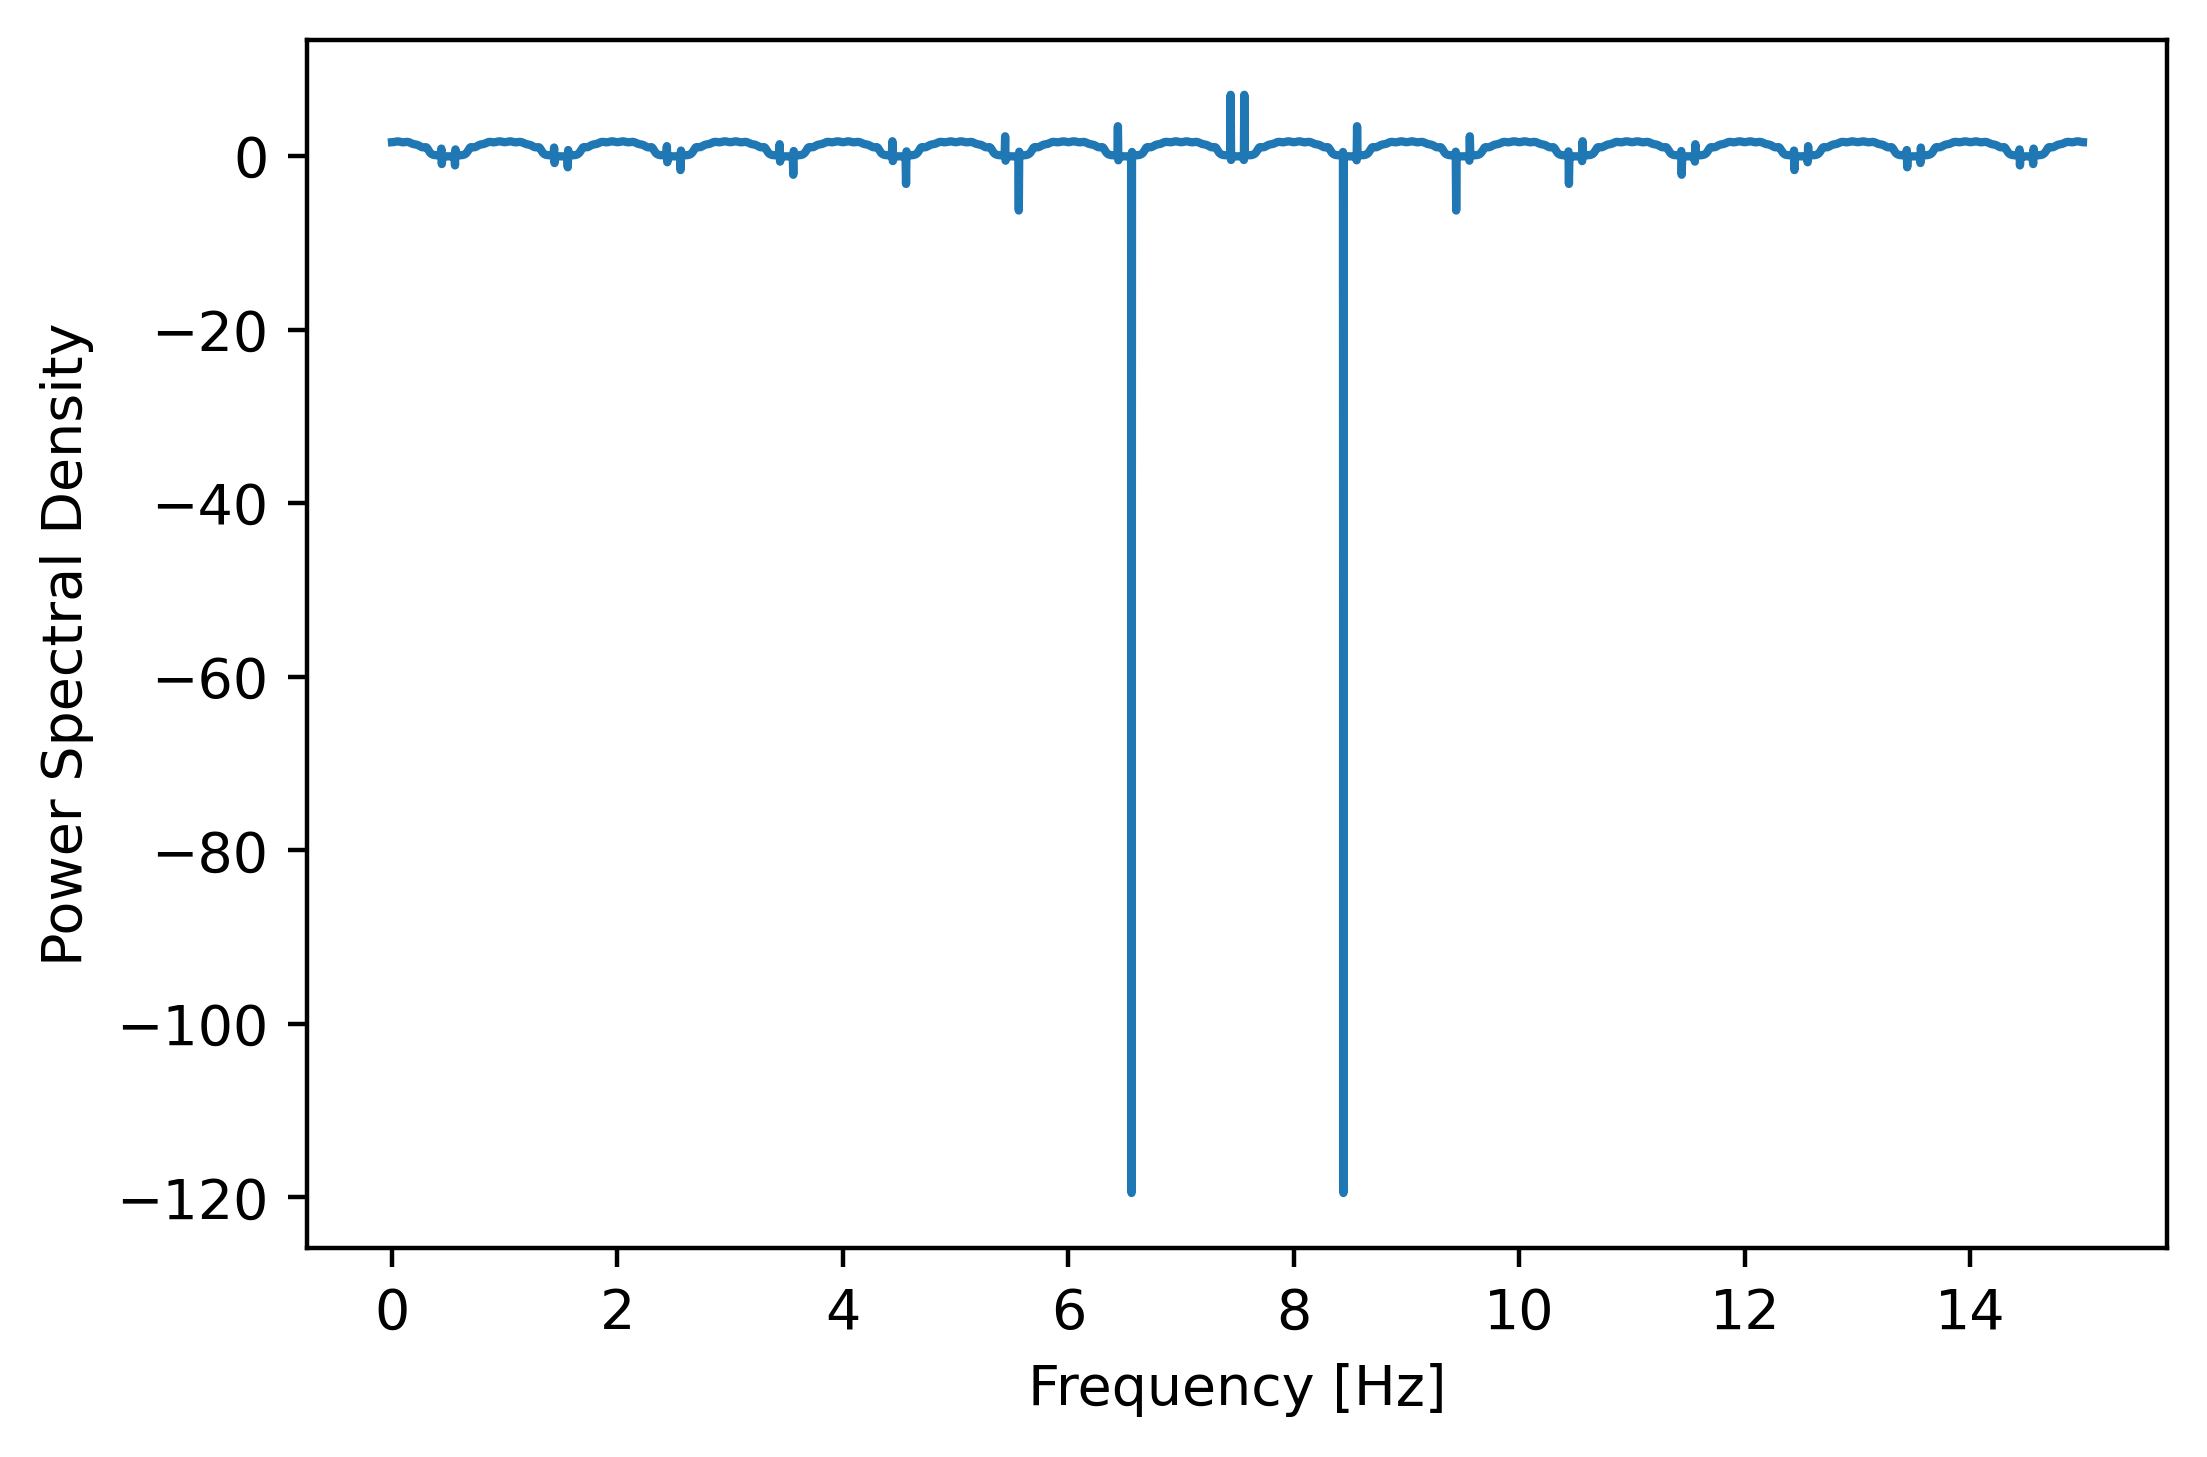

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


The Sp_Peak is:7.4394373534774685 in strain: 8


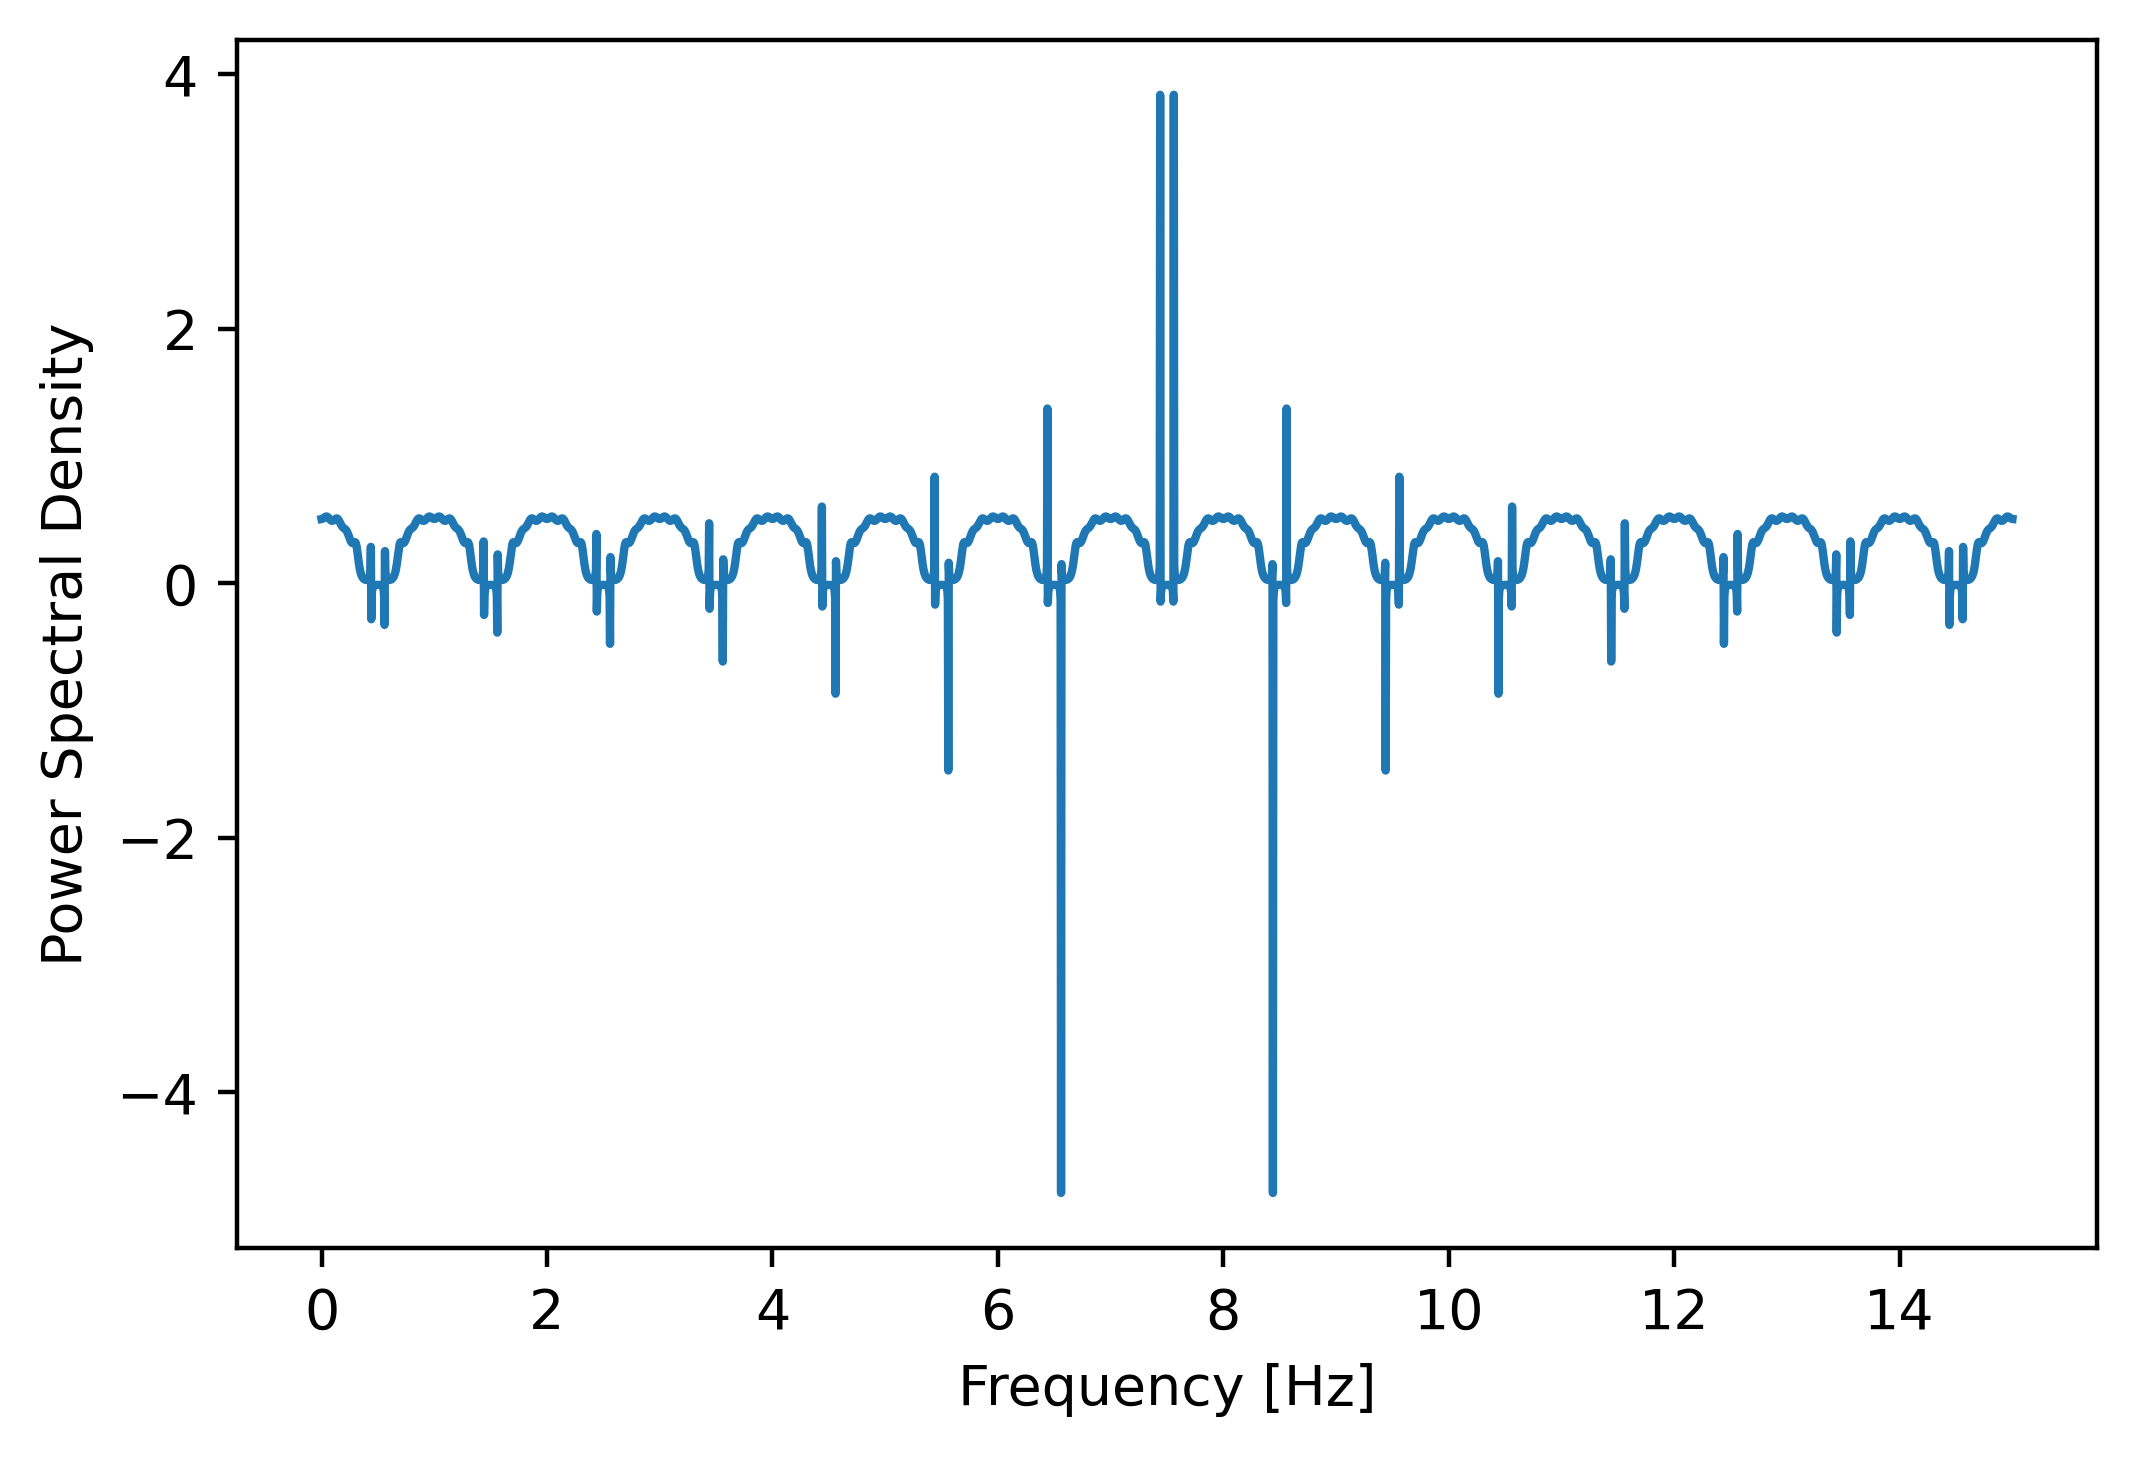

[ 0.         12.52930451 12.52930451 12.52930451 12.52930451  0.80750195
 12.52930451  0.80750195  0.80750195]


In [21]:
keys = ["Time","S1","S2","S3","S4","S5","S6","S7","S8"]

data_80 = pd.read_csv("P1_T80.csv") 
data_80.columns = keys

t = data_80["Time"]
Sig1_80 = data_80["S1"]
Sig2_80 = data_80["S2"]
Sig3_80 = data_80["S3"]
Sig4_80 = data_80["S4"]
Sig5_80 = data_80["S5"]
Sig6_80 = data_80["S6"]
Sig7_80 = data_80["S7"]
Sig8_80 = data_80["S8"]

r = 9

AR(t,Sig1_80,r,1,7.5)
AR(t,Sig2_80,r,2,7.5)
AR(t,Sig3_80,r,3,7.5)
AR(t,Sig4_80,r,4,7.5)
AR(t,Sig5_80,r,5,7.5)
AR(t,Sig6_80,r,6,7.5)
AR(t,Sig7_80,r,7,7.5)
AR(t,Sig8_80,r,8,7.5)

# # Plot of the espectrogram
# plt.figure(dpi=400)
# plt.plot(f,S)
# plt.ylabel("Power Spectral Density")
# plt.xlabel("Frequency [Hz]")
# plt.grid()
# plt.show()
# print(pred)

print(Error/7.5*100)


In [ ]:
AR(t,Sig1,r,1,5)
AR(t,Sig2,r,2,5)
AR(t,Sig3,r,3,5)
AR(t,Sig4,r,4,5)
AR(t,Sig5,r,5,5)
AR(t,Sig6,r,6,5)
AR(t,Sig7,r,7,5)
AR(t,Sig8,r,8,5)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


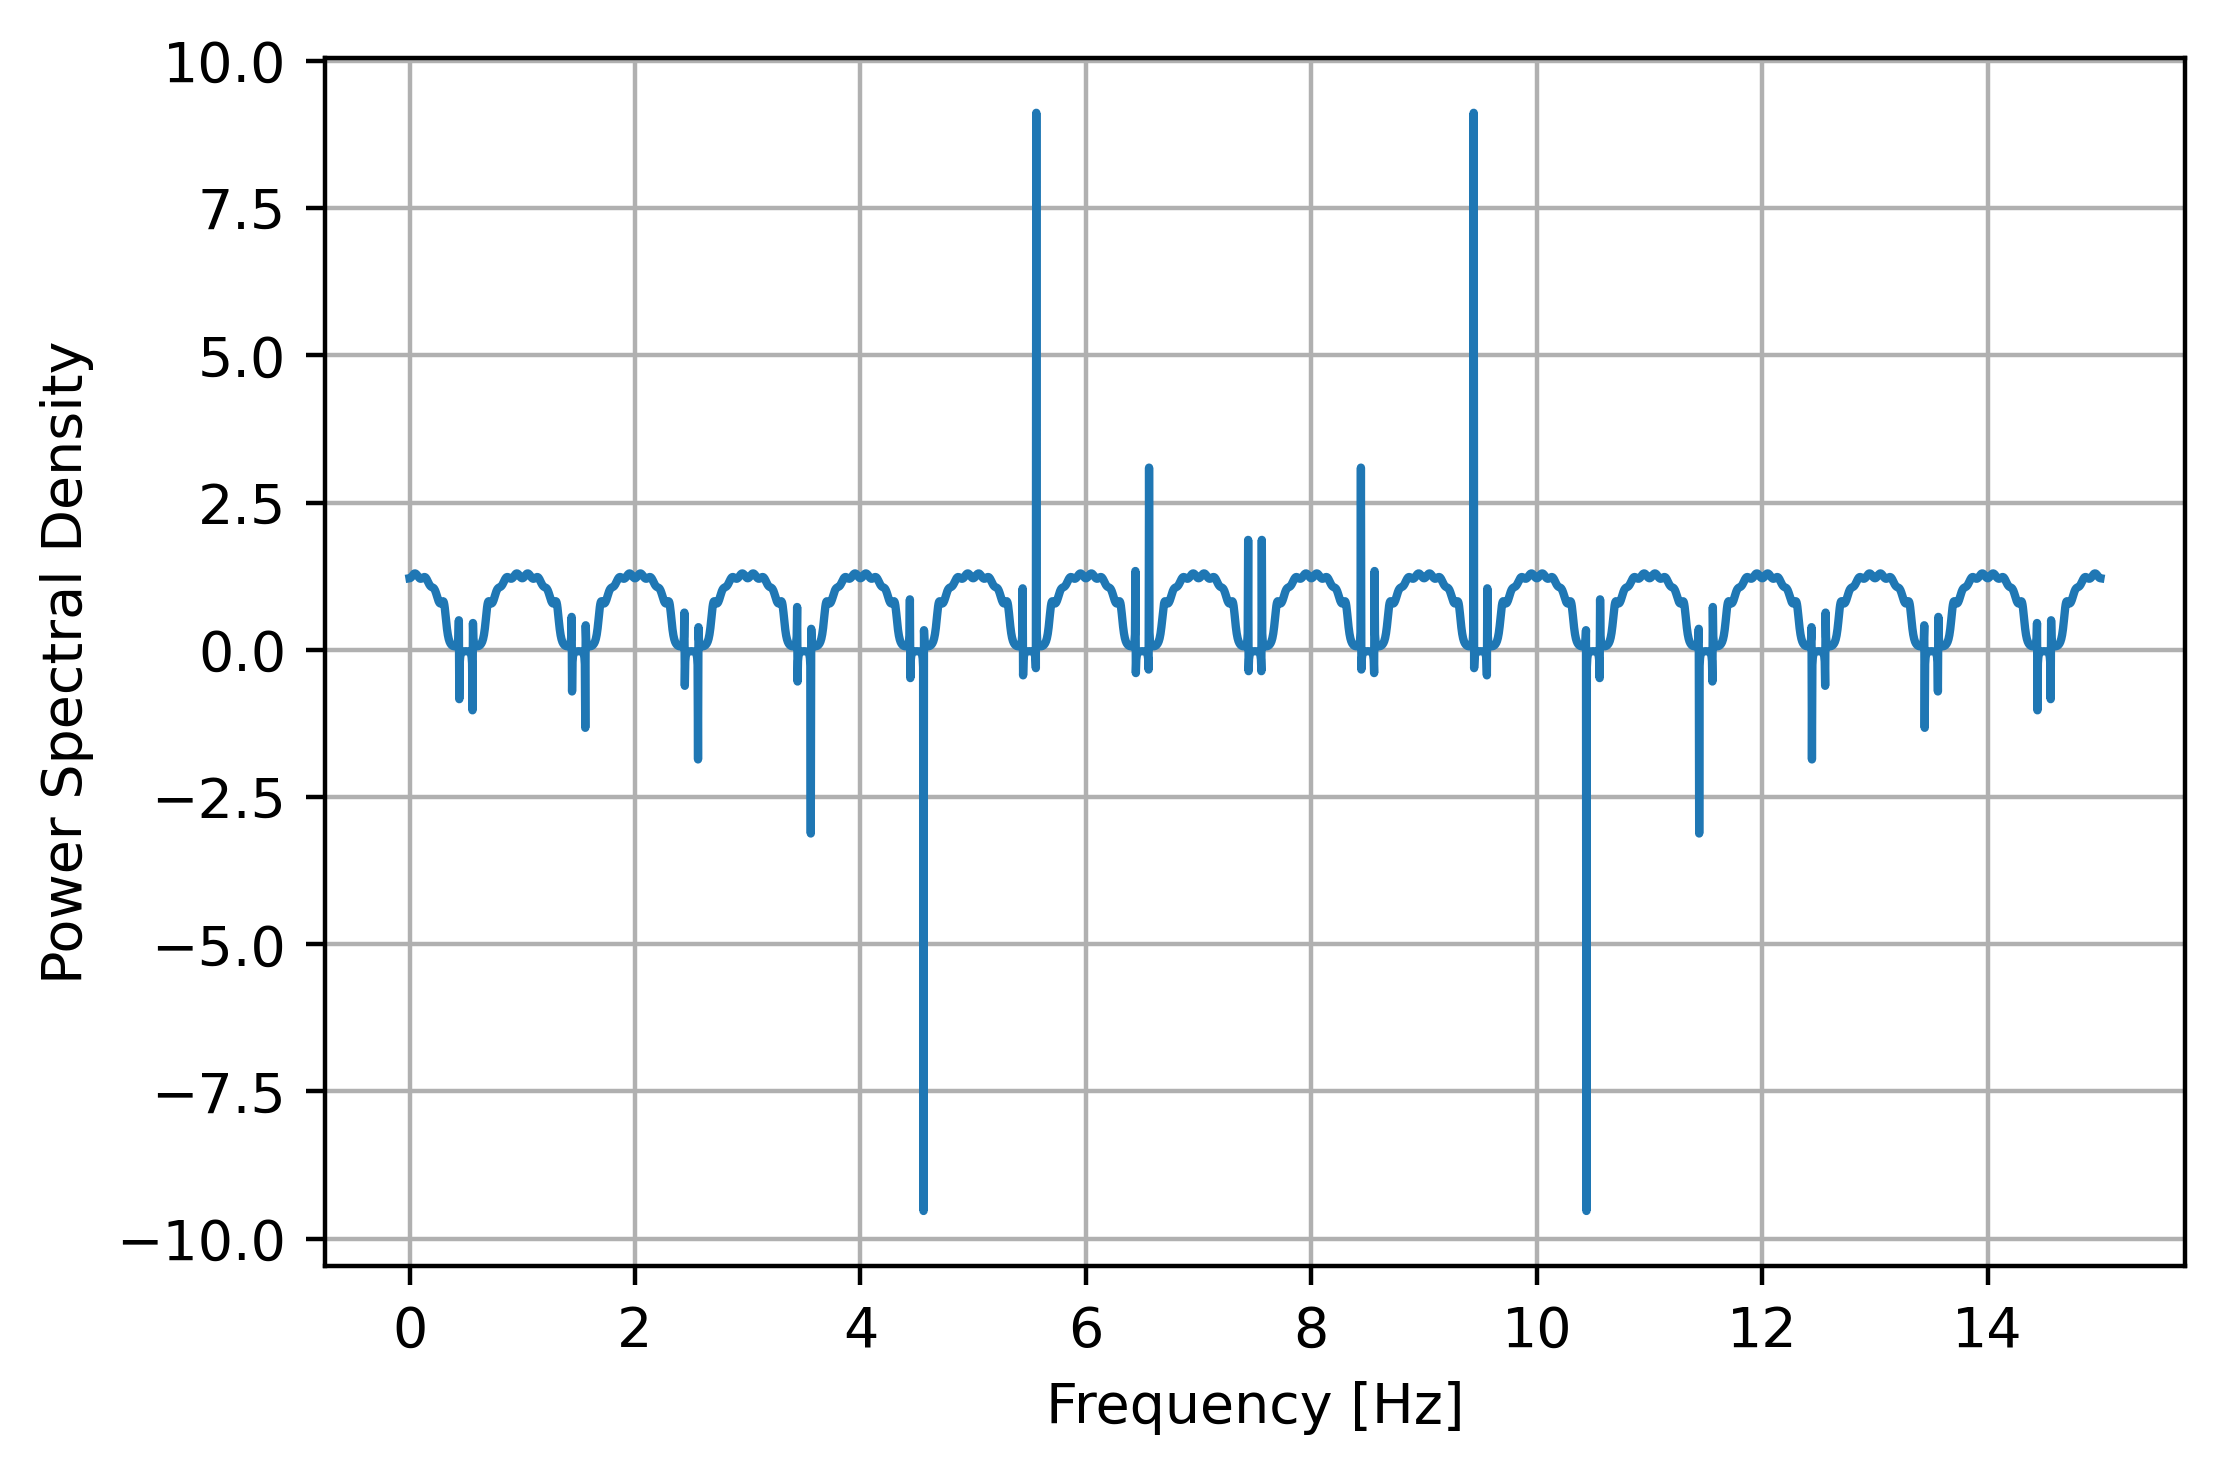

In [20]:
r = 1024
fs = 1/r
Numb = r*15



for i in range(len(t)):
  if t.iloc[i] == 3.0:
    ini_indx = i
    # print(i)
    # print(ini_indx)

  if t.iloc[i] == 18.0:
    # print(i)
    end_indx = i
    # print(end_indx)

# Select only the time window of the Stimulation
t_set = t[ini_indx:end_indx]
S_set = Sig2[ini_indx:end_indx]
# Make a new data frame to manipulate the information to pleasure.
S_D = pd.DataFrame()
S_D["Time"] = t_set
S_D["Signal"] = S_set

RS_D = S_D.reset_index()
# Adfuller test to estimate the order of the autoregresive model.

# AR_Model 
modelARp = AutoReg(RS_D["Signal"],lags = p)
pred = modelARp.fit()
# plt.plot(RS_D["Time"][p:],RS_D["Signal"][p:], label= "Original")
# plt.plot(RS_D["Time"][p:],pred.fittedvalues,label = "Fitted")
# plt.xlabel("Time [s]")
# plt.ylabel("Amplitude ($\mu V$)")
# plt.legend()
# plt.grid()
# plt.tight_layout()
# plt.show()



# Variance of the estimated errors
var1 = np.var(pred.resid)

P = np.zeros(len(pred.params))
for i in range(1,len(pred.params)):
  #print(i)
  P[i] = pred.params[i]


# DataFrame and sumPrint Sum
K = pd.DataFrame()


# Define a function to determinate the sumatory in all the parameters
pi = np.pi
j = 1
den = np.zeros(len(f))
k = np.zeros((len(pred.params),len(f)))
s = np.zeros(len(f))
for i in range(1,len(pred.params)):
  for j in range(len(f)):
    k[i,j] = P[i]*np.cos(2*i*pi*f[j])
for i in range(len(f)):
  s[i] = sum(k[:,i])

# print(sum)    
# for i in range(len(f)): 
#     sum[i] = sum(d[:,j])   

#  print(sum(d[:,1]))

# Spectrogram
S = var1/s
# Peak of the spectrogram
# L = np.argmax(S)
# print(f"The Sp_Peak is:{f[L]} in strain: {count}")

#Plot of the espectrogram
plt.figure(dpi=400)
plt.plot(f,S)
plt.ylabel("Power Spectral Density")
plt.xlabel("Frequency [Hz]")
plt.grid()
plt.show()

# peak[count] = f[L]
# Error[count] = abs(f[L] - Or)


In [ ]:
print(peak)
r = np.zeros(len(peak))
for i in range(1,len(peak)):
  r[i] = abs(15 - peak[i] )
print(r)

#0.         0.93969784 0.93969784 0.93969784 0.93969784 0.06056265
#0.93969784 0.06056265 0.06056265]

[0.         6.56030216 6.56030216 6.56030216 6.56030216 7.43943735
 6.56030216 7.43943735 7.43943735]
[0.         8.43969784 8.43969784 8.43969784 8.43969784 7.56056265
 8.43969784 7.56056265 7.56056265]


#Arima

In [ ]:
# ################## Objetivo:  Dadas las observaciones estimar la frecuencia de estimulacion
# =============================================================================
# Stimulation part
# =============================================================================
# t_st = t[767:4607]          # Time stimulation   
# Sig1_st = Sig1[767:4607]    #Signal stimulated

# plt.plot(t_st,Sig1_st,color="royalblue")
# plt.title("Stimulated Signal")
# plt.xlim(2.5,18.5)
# plt.ylim(min(Sig1)-5,max(Sig1)+5)
# plt.xlabel("Time [s]")
# plt.ylabel("Amplitude ($\mu V$)")
# plt.grid()
# plt.savefig("stim_signal.png",dpi=400)
# plt.show()

In [ ]:
# ADFuLLER
from statsmodels.tsa.stattools import adfuller


TestAF = adfuller(S1_set)
print("Dick-fuller statistics:",TestAF[0])
print("P-value:",TestAF[1])

TestAFd1 = adfuller(S1_set.diff().dropna())
print("Dick-fuller statistics:",TestAFd1[0])
print("P-value:",TestAFd1[1])

TestAFd2 = adfuller(S1_set.diff().diff().dropna())
print("Dick-fuller statistics:",TestAFd2[0])
print("P-value:",TestAFd2[1])



Dick-fuller statistics: -4.649863098393912
P-value: 0.00010442660156329182
Dick-fuller statistics: -10.975015020188941
P-value: 7.708882353067606e-20
Dick-fuller statistics: -16.45672494818476
P-value: 2.350702791018248e-29


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


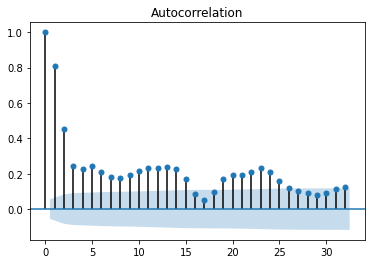

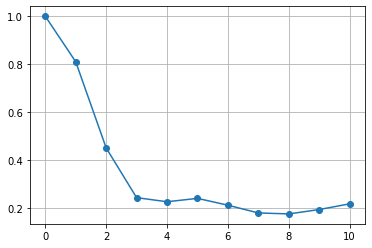

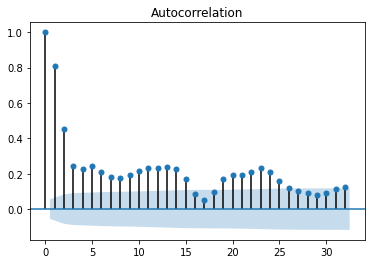

In [ ]:
# The constant variance assumption
# # var = np.var(Sig1_st)
# sq3_S1 = Sig1_st**(1/3)

from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf
# ACF
lag_acf = acf(S1_set,nlags=10)
plt.plot(lag_acf,marker = "o")
plt.grid()
plot_acf(S1_set)
#plot_acf(sq3_S1)




/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


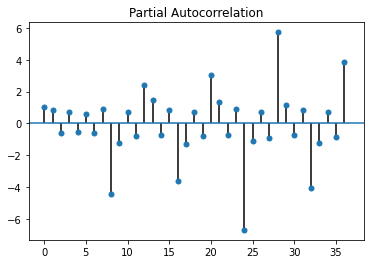

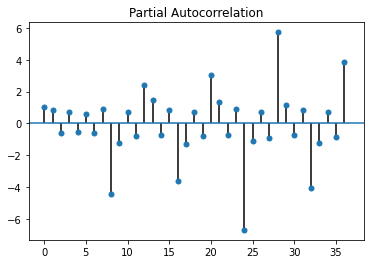

In [ ]:
#PACF
# ==================
plot_pacf(Sig1_st)
#plot_pacf(sq3_S1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                     S1   No. Observations:                 1281
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1930.357
Date:                Thu, 27 Oct 2022   AIC                           3870.713
Time:                        17:16:50   BIC                           3896.486
Sample:                             0   HQIC                          3880.391
                               - 1281                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4932      0.019     25.409      0.000       0.455       0.531
ar.L2         -0.7463      0.020    -37.816      0.000      -0.785      -0.708
ma.L1          1.9981      0.110     18.125      0.0

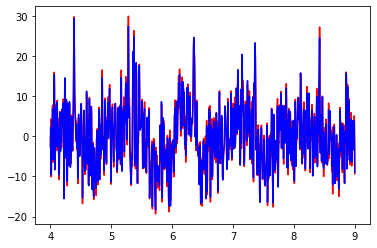

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                     S1   No. Observations:                 1281
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -2189.225
Date:                Thu, 27 Oct 2022   AIC                           4390.450
Time:                        17:16:52   BIC                           4421.382
Sample:                             0   HQIC                          4402.064
                               - 1281                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0325      0.308     -0.106      0.916      -0.636       0.571
ar.L1          1.0400      0.026     39.375      0.000       0.988       1.092
ar.L2         -0.5242      0.026    -20.040      0.0

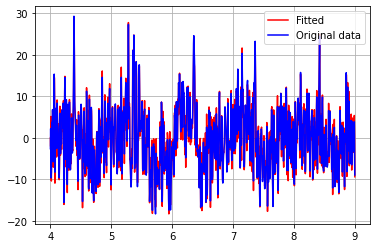

In [ ]:

from statsmodels.tsa.arima.model import ARIMA


modA= ARIMA(S1_set,order = (2,1,2))

resmodA = modA.fit()
print(resmodA.summary())
plt.plot(t_set,resmodA.fittedvalues,color="red")
plt.plot(t_set,S1_set,color="blue")
plt.plot()
plt.show()


# =============================================================================
# With constant variance?
# =============================================================================

modB = ARIMA(S1_set, order = (2,0,2))
resmodB = modB.fit()
print(resmodB.summary())
plt.plot(t_set,resmodB.fittedvalues,color="red",label= "Fitted")
plt.plot(t_set,S1_set,color="blue",label = "Original data")
plt.legend()
plt.grid()